In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

#Part I :   

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import json
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#Part II :

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score

#Part III :

#import the necessary libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# PART I :

In [70]:
data=pd.read_json("Part1 - Car-Attributes.json")
car_data=pd.read_csv("Part1 - Car name.csv")
cdata=pd.concat([data, car_data.reindex(data.index)], axis=1)
cdata.to_csv("auto_mgp.csv")


In [71]:
cdata.head()


mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino

Check for Data type of columns

In [72]:
cdata.shape

(398, 9)

Check for Data type of columns

In [73]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 24.9+ KB


In [74]:
cdata.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

Check for null values.

In [75]:
cdata.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [76]:
cdata[cdata['hp']=="?"]

mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl

In [77]:
cdata['hp'].replace("?",np.nan, inplace=True)

In [78]:
hp = cdata['hp'].dropna()
hp.count()

392

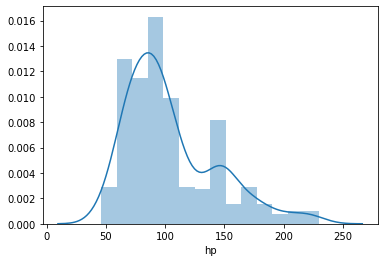

In [79]:
sns.distplot(pd.to_numeric(hp))

In [80]:
# Since this does not look to be normally distributed, let us impute by using median
cdata['hp'].fillna((cdata['hp'].median()), inplace=True)
cdata['hp'] = cdata['hp'].astype('float')

In [81]:
cdata.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [101]:
# Let us now remove duplicate/irrelevant columns

cdata= cdata.drop(['origin','car_name'], axis =1)

cdata.head()

mpg  cyl   disp     hp    wt   acc  yr
0  18.0    8  307.0  130.0  3504  12.0  70
1  15.0    8  350.0  165.0  3693  11.5  70
2  18.0    8  318.0  150.0  3436  11.0  70
3  16.0    8  304.0  150.0  3433  12.0  70
4  17.0    8  302.0  140.0  3449  10.5  70

In [102]:
df=cdata.corr(method='kendall')

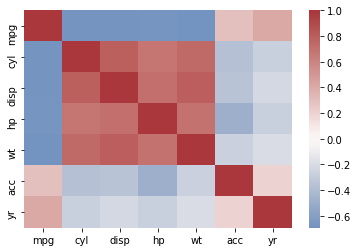

In [103]:
sns.heatmap(df,center=0,cmap="vlag")

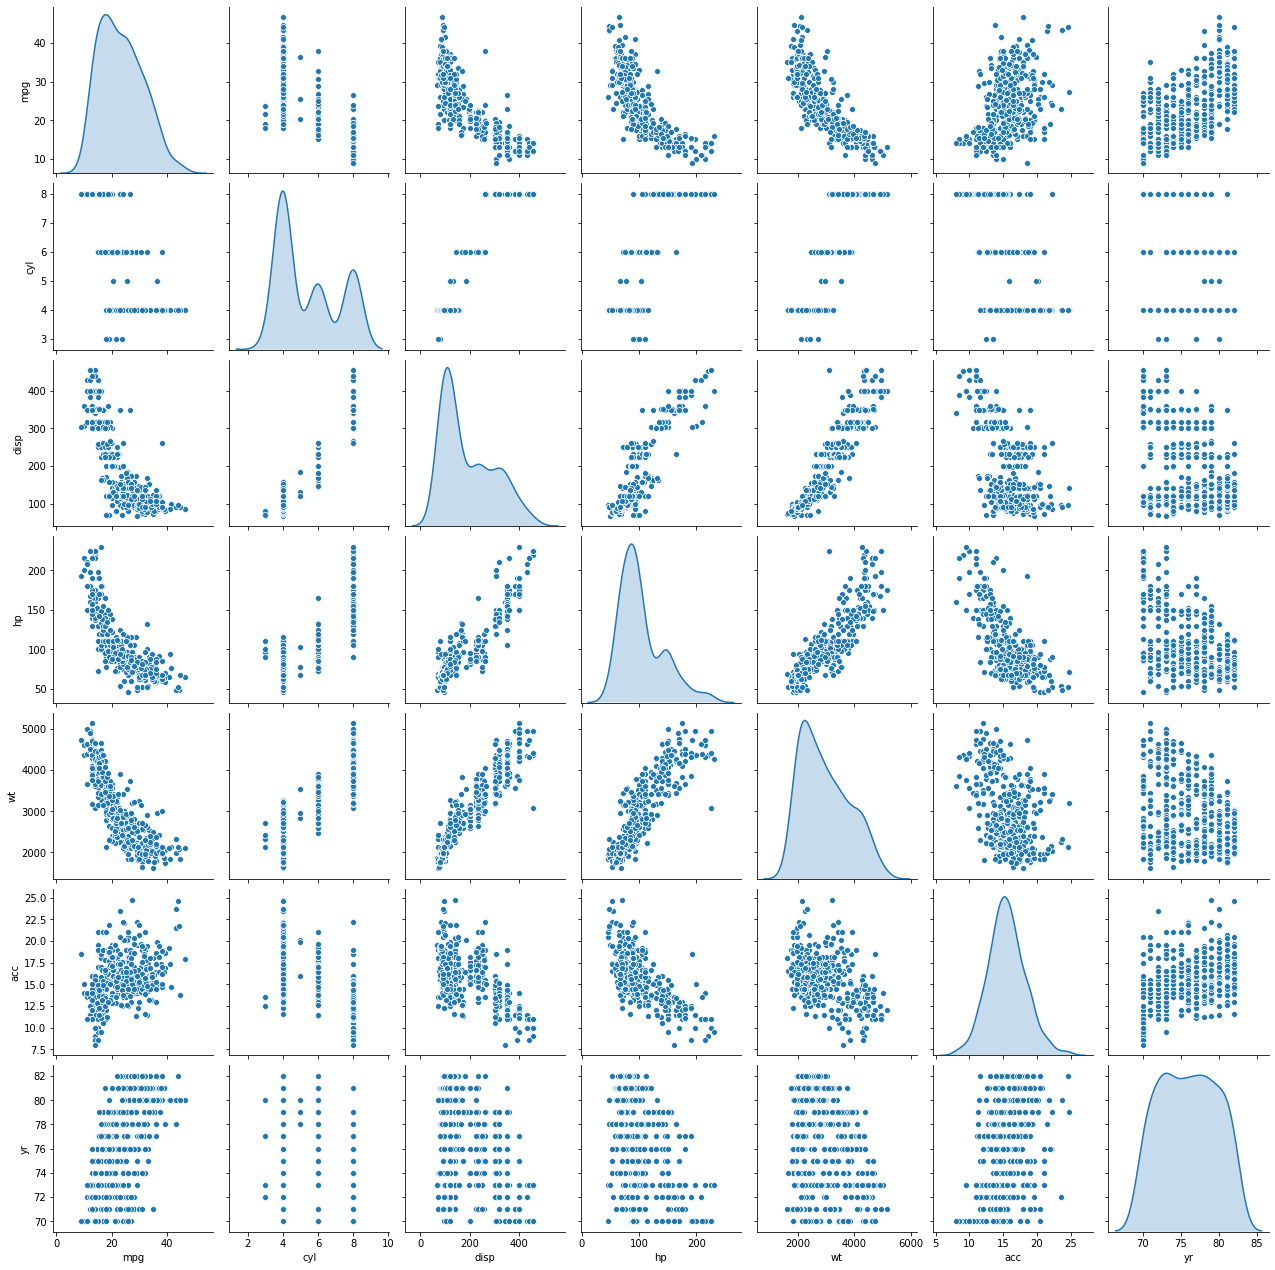

In [104]:
sns.pairplot(cdata,diag_kind='kde')

Observations :
    
From diagonal plots we can see origin has 3 points (evident from data)
yr - shows two peaks majorily
acc,mpg are nearly normal
cyl and disp shows 3 clusters while wt shows 2

from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
(correlation too gives high negative correlation)
Cyl too shows negative correlation with levels

# Visualizing our dependent variable for outliers and skewnwss

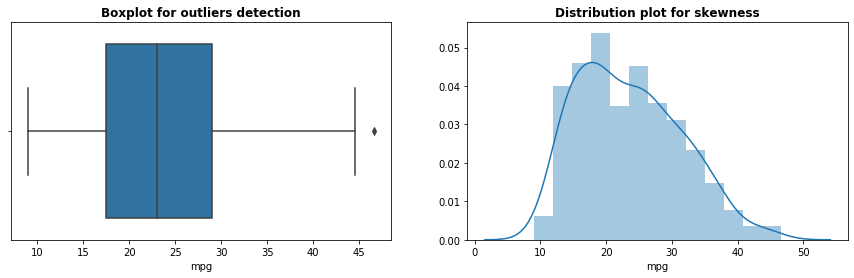

In [85]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(cdata["mpg"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1, 2, 2)
sns.distplot(cdata["mpg"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

From the above it is observed that target variable is almost normally distributed.

# Visualizing 'Horsepower' feature for outliers and skewnwss

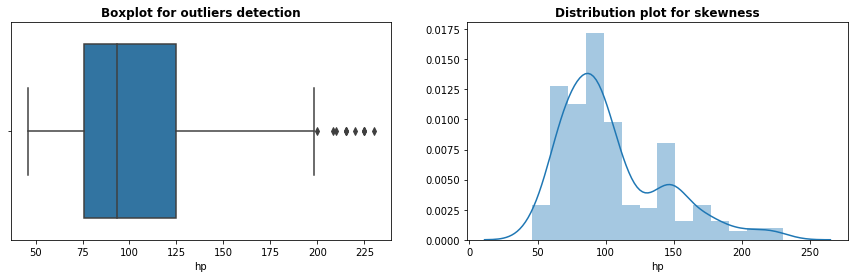

In [86]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(cdata["hp"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1, 2, 2)
sns.distplot(cdata["hp"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

From the above plots it is observed the Horsepower column contains few outliers in upper boundary and it is Right Skewed.

Count plot for all discrete features

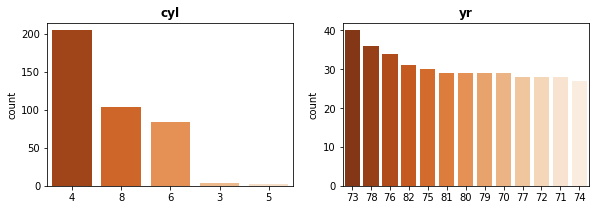

In [87]:
discrete_columns_list = ['cyl', 'yr']
plt.figure(figsize = (15, 3))
for i in range(len(discrete_columns_list)):
    plt.subplot(1, 3, i+1)
    sns.countplot(cdata[discrete_columns_list[i]], 
                  order = cdata[discrete_columns_list[i]].value_counts().index, 
                  palette='Oranges_r')
    plt.title(discrete_columns_list[i], fontweight="bold")
    plt.xlabel('')

From the above visuals:

Cylinders: Most of the automobiles contains 4 cylinders.
Year: No cars manufactured in the year 73.

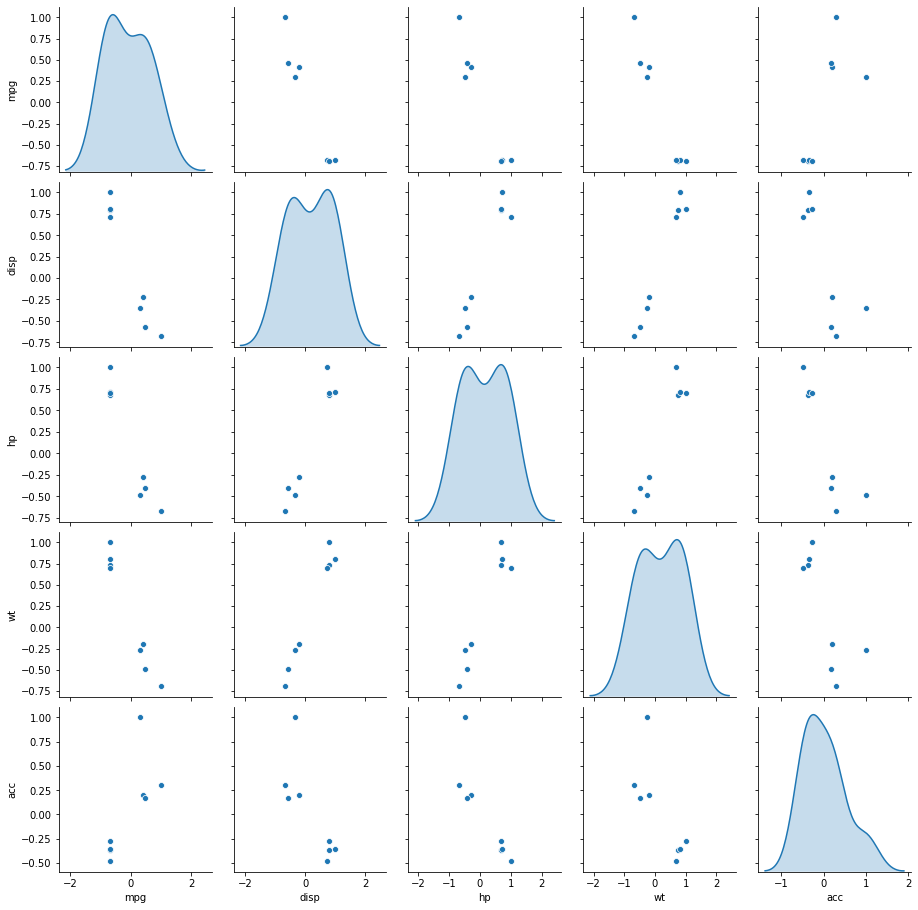

In [88]:
#### Joint Distribution of a few pairs of columns
sns.pairplot(df[['mpg', 'disp', 'hp', 'wt', 'acc']],
             diag_kind="kde")
plt.show()

From the above plots it is observed that all the pairs of columns have high correlation between them and most of the columns are normally distributed.

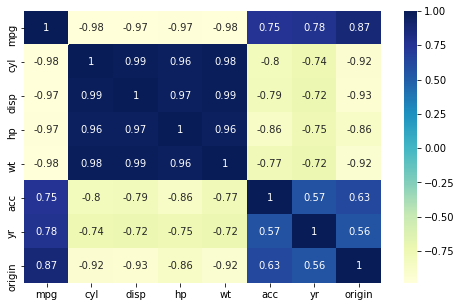

In [89]:
# heatmap to visualize the correlation matrix between the numeric variables
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

From the above heatmap

Cylinders, Displacement, HorsePower, weight are high negitive correlation with MPG.
Cylinders, Displacement, HorsePower, weight are having high positive correlation between them.

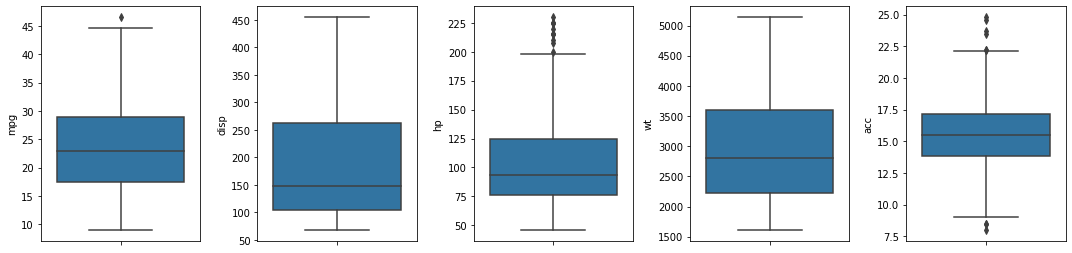

In [105]:
# Plotting box plot to check the outliers
plt.figure(figsize=(15, 7))
columns = ['mpg', 'disp', 'hp', 'wt', 'acc']
for i in range(5):
    plt.subplot(2, 5, i+1)
    sns.boxplot(cdata[columns[i]], orient="v")
    
plt.tight_layout()

# Separating Dependant and Independant Variables

In [106]:
X = cdata.drop('mpg', axis=1)
Y = cdata[['mpg']]
print(X.shape, Y.shape)

(398, 6) (398, 1)


# Normalizing data :

In [107]:
XScaled=X.apply(zscore)
XScaled.head(10)

cyl      disp        hp        wt       acc        yr
0  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426
1  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426
2  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426
3  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426
4  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426
5  1.498191  2.262118  2.454408  1.620492 -2.021656 -1.627426
6  1.498191  2.502182  3.030708  1.635863 -2.384735 -1.627426
7  1.498191  2.367746  2.899730  1.586204 -2.566274 -1.627426
8  1.498191  2.511784  3.161685  1.719809 -2.021656 -1.627426
9  1.498191  1.887617  2.244844  1.039961 -2.566274 -1.627426

# Hierarchical Clustering and PCA

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

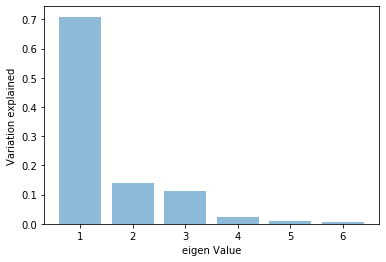

In [110]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

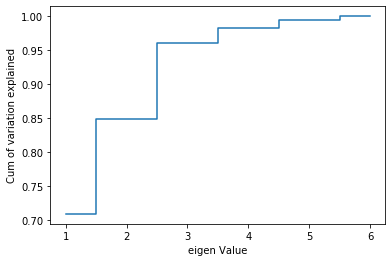

In [111]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [112]:
pca_fit = PCA(n_components=3)
pca_fit.fit(XScaled)
print(pca_fit.components_)
print(pca_fit.explained_variance_ratio_)
pca_final = pca_fit.transform(XScaled)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]]
[0.70884563 0.13976166 0.11221664]


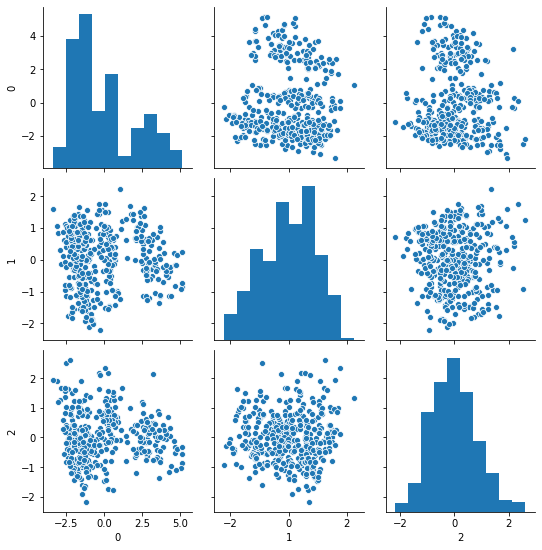

In [113]:
sns.pairplot(pd.DataFrame(pca_final))

In [114]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(pca_final)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [115]:
X['labels'] = model.labels_
X.head(10)

cyl   disp     hp    wt   acc  yr  labels
0    8  307.0  130.0  3504  12.0  70       1
1    8  350.0  165.0  3693  11.5  70       1
2    8  318.0  150.0  3436  11.0  70       1
3    8  304.0  150.0  3433  12.0  70       1
4    8  302.0  140.0  3449  10.5  70       1
5    8  429.0  198.0  4341  10.0  70       1
6    8  454.0  220.0  4354   9.0  70       1
7    8  440.0  215.0  4312   8.5  70       1
8    8  455.0  225.0  4425  10.0  70       1
9    8  390.0  190.0  3850   8.5  70       1

In [116]:
# Check the number of data in each cluster
Clust_data = X.groupby(['labels'])
Clust_data.mean()

cyl        disp          hp           wt        acc         yr
labels                                                                     
0       4.628472  143.855903   86.413194  2591.128472  16.316667  76.729167
1       7.980000  345.470000  160.400000  4121.560000  12.702000  73.740000
2       4.000000  100.600000   58.600000  2382.800000  22.670000  78.000000

In [117]:
Z = linkage(pca_final, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(pca_final))
c

0.8095360190926154

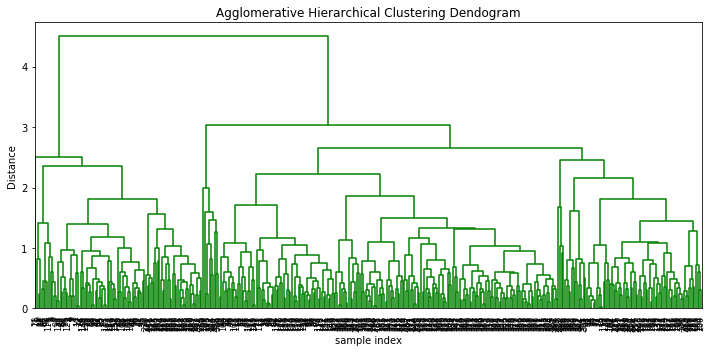

In [118]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

# K-Mean Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

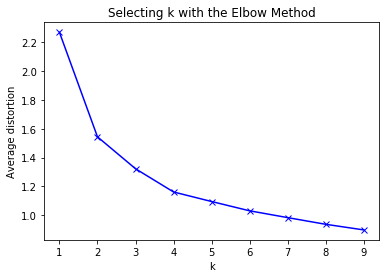

In [120]:
# Using the elbow method to find  the optimal number of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    prediction=model.predict(XScaled)
    meanDistortions.append(sum(np.min(cdist(XScaled, model.cluster_centers_, 'euclidean'), axis=1)) / XScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [121]:
KMean_model=KMeans(4)
KMean_model.fit(XScaled)
prediction=KMean_model.predict(XScaled)

#Append the prediction 
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
XScaled.head()

Groups Assigned : 



cyl      disp        hp        wt       acc        yr  GROUP
0  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426      1
1  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426      1
2  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426      1
3  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426      1
4  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426      1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1525B3F0>,
      dtype=object)

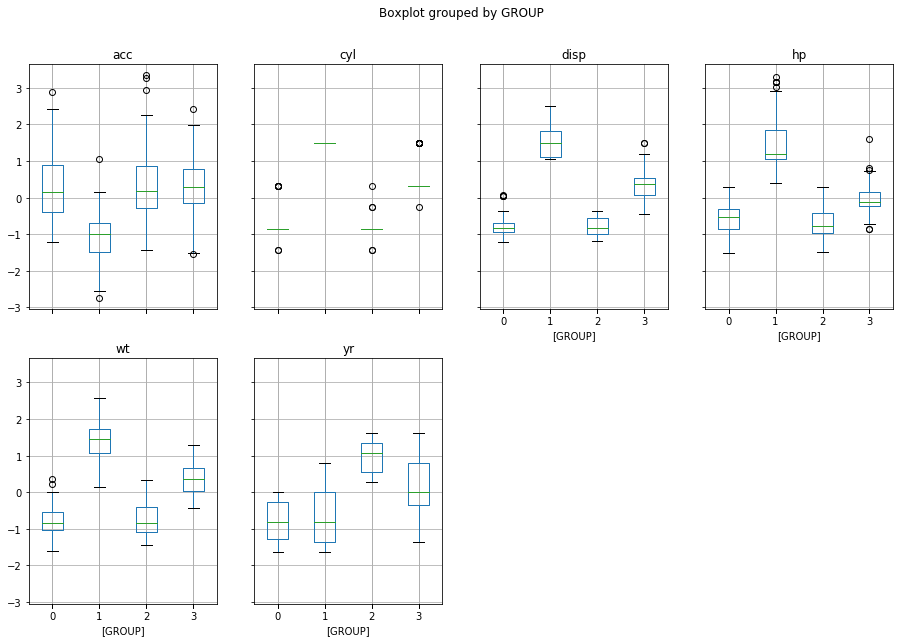

In [122]:
XScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# Linear Regression Model to original data

In [124]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(XScaled, Y)
regression_model.score(XScaled, Y)

0.811828107631821

# Linear Regression Model to cluster = 3 ( After dimentionality reduction using PCA)

In [125]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(pca_final, Y)
regression_model_pca.score(pca_final, Y)

0.7799909620572006

# Conclusion :

From above we can see that pca is doing a very good job.Accuracy with pca is approx 77% and with raw data approx 81% but note that pca 77% accuracy is with dimension reduction.But every thing has two sides, disadvantage of pca is we cannot do interpretation with the model.

# PART II

In [3]:
wdata=pd.read_excel("Part2 - Company.xlsx")


In [4]:
wdata.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [5]:
wdata.shape

(61, 5)

In [6]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.2+ KB


In [7]:
wdata.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [8]:
#dropping the target variable
X = wdata.drop('Quality',axis=1)
Y = wdata[['Quality']]

In [9]:
#scaling the numeric variables
XScaled = X.apply(zscore)
XScaled.head()

A         B         C         D
0 -1.168034 -1.561080 -1.061569 -0.103138
1  0.904992  0.284923  0.306077  0.823013
2  0.660147  0.807376  0.321443  0.264129
3 -0.939512 -1.630740 -1.706975 -1.125099
4 -0.972158 -0.986381 -1.614775 -0.741864

In [10]:
from sklearn.cluster import KMeans
#applying kmeans with 2 clusters
k_means = KMeans(n_clusters = 2)
k_means.fit(XScaled)
labels = k_means.labels_

#connecting labels to the original dataset
wdata["Quality_Pred"] = labels
wdata.head()

A    B    C    D    Quality  Quality_Pred
0   47   27   45  108  Quality A             1
1  174  133  134  166  Quality B             0
2  159  163  135  131        NaN             0
3   61   23    3   44  Quality A             1
4   59   60    9   68  Quality A             1

In [11]:
#renaming the cluster labels
wdata['Quality_Pred'] = wdata['Quality_Pred'].replace({0: 'Quality A', 1: 'Quality B'})
wdata.head(10)

A    B    C    D    Quality Quality_Pred
0   47   27   45  108  Quality A    Quality B
1  174  133  134  166  Quality B    Quality A
2  159  163  135  131        NaN    Quality A
3   61   23    3   44  Quality A    Quality B
4   59   60    9   68  Quality A    Quality B
5  153  140  154  199        NaN    Quality A
6   34   28   78   22  Quality A    Quality B
7  191  144  143  154        NaN    Quality A
8  160  181  194  178  Quality B    Quality A
9  145  178  158  141        NaN    Quality A

In [12]:
# Checking accuracy of prediction by dropping nan value rows
wdata_Temp = wdata.dropna()
predicted = wdata_Temp['Quality_Pred']
actual=wdata_Temp['Quality']

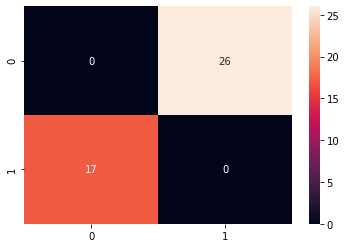

In [13]:

#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(actual, predicted)
sns.heatmap(cm, annot = True);

In [14]:
from sklearn import metrics
model_score_NB=metrics.accuracy_score(actual, predicted)
model_score_NB

0.0

All prediction seems to be correct (result is with 100% accuracy), hence we can consider predicted column to fill for missed records

# PART III 

In [16]:
#load the csv file and make the data frame

vehicle_df = pd.read_csv("Part3 - vehicle.csv")

In [17]:
#display the first 5 rows of dataframe
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [18]:
print("The dataframe has {} rows and {} columns".format(vehicle_df.shape[0],vehicle_df.shape[1]))

The dataframe has 846 rows and 19 columns


In [19]:
#display the information of dataframe
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [20]:
#display in each column how many null values are there
vehicle_df.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

From above we can see that max null values is 6 which are in two columns 'radius_ratio', 'skewness_about'. so we have two options either we will drop those null values or we will impute those null values. Dropping null values is not a good way because we will lose some information.but we will go with both options then we will see what's the effect on model.

In [21]:
#display 5 point summary of dataframe
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

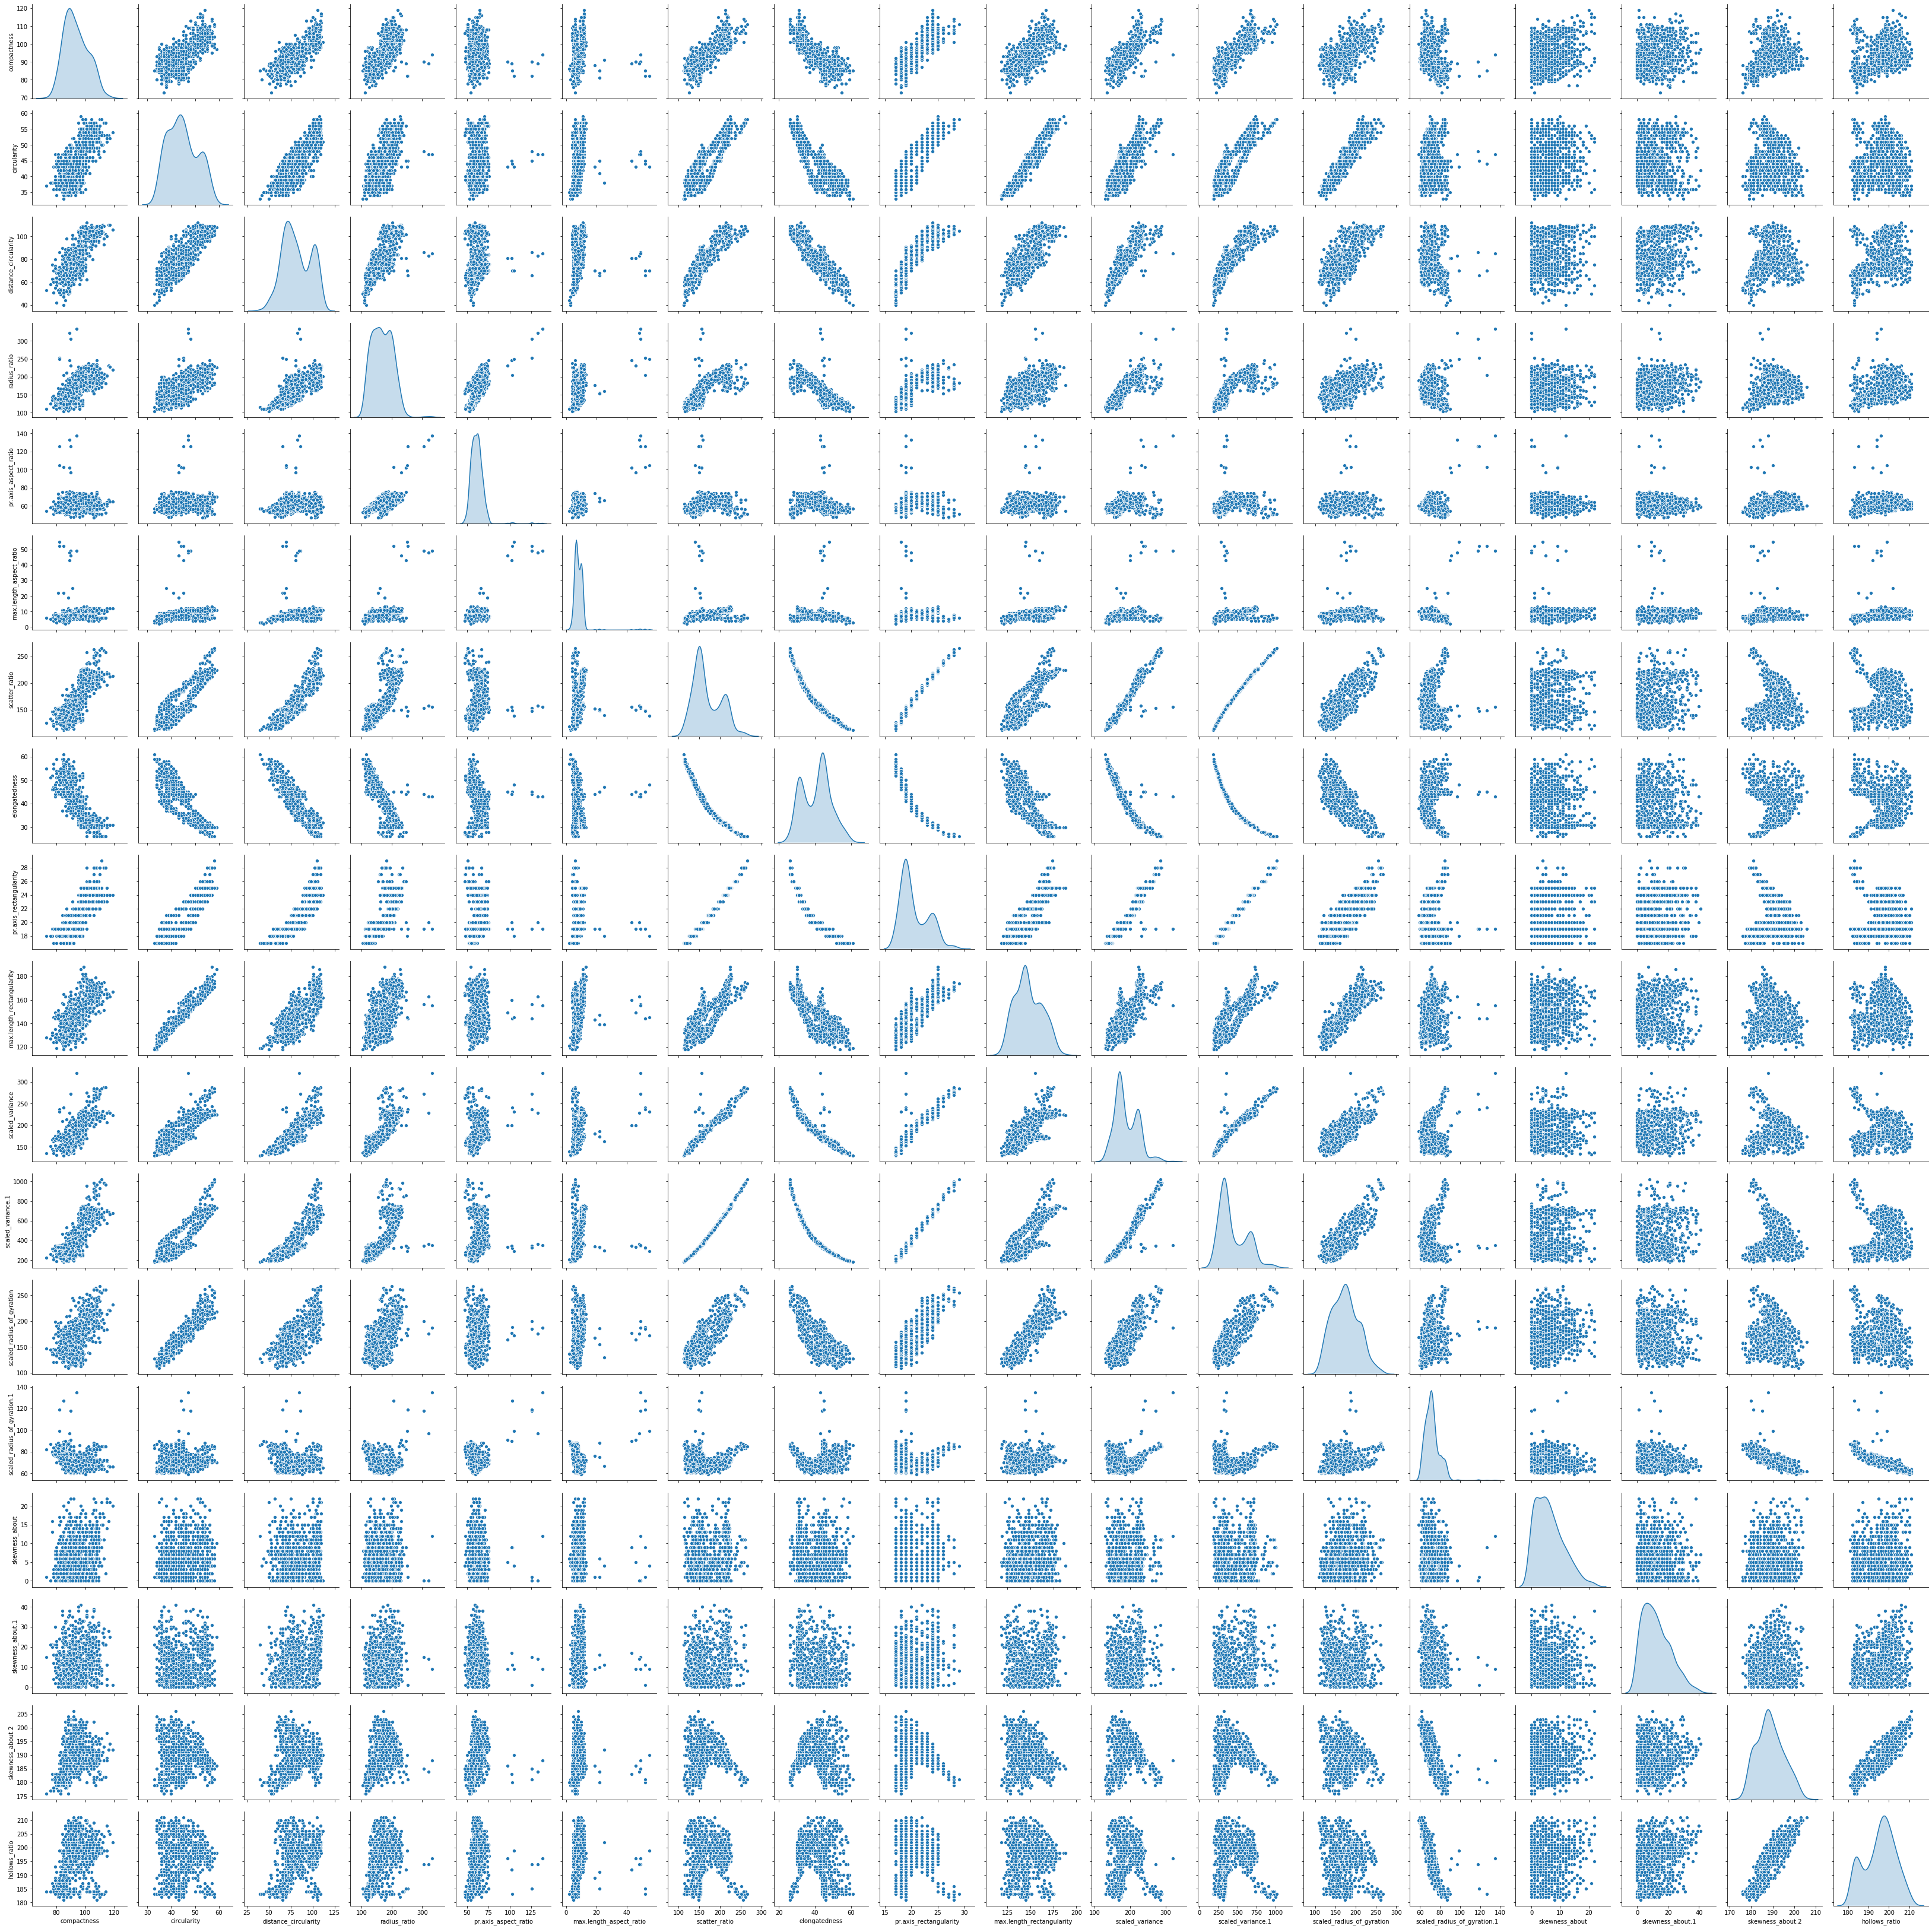

In [22]:
sns.pairplot(vehicle_df,diag_kind='kde')
plt.show()

From above pair plots we can see that many columns are correlated and many columns have long tail so that is the indication of outliers.we will see down the line with the help of correlation matrix what's the strength of correlation and outliers are there or not.

From above we can see that our data has missing values in some column. so before building any model we have to handle missing values. we have two option either we will drop those missing values or we will impute missing values. we will go with both options and see what's the effect on model. so first we will drop the missing values. Before dropping missing values we will create another dataframe and copy the original dataframe data into that. It's a good practice to keep the original dataframe as it is and make all modifications to the new dataframe.

# Dropping Missing Values

In [23]:
#copy the dataframe to another dataframe and drop null/missing values from the newly created dataframe
new_vehicle_df = vehicle_df.copy()

so now we have new dataframe called new_vehicle_df and we will make changes in this new dataframe.

In [24]:
#display the first 5 rows of new dataframe
new_vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [25]:
#display the shape of dataframe
print("Shape of newly created dataframe:",new_vehicle_df.shape)

Shape of newly created dataframe: (846, 19)


In [26]:
#drop the null values from the new dataframe
new_vehicle_df.dropna(axis=0,inplace=True)

In [27]:
#now we will see what is the shape of dataframe
print("After dropping missing values shape of dataframe:",new_vehicle_df.shape)

After dropping missing values shape of dataframe: (813, 19)


In [28]:
#display 5 point summary of new dataframe
new_vehicle_df.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

# Analysis of each column with the help of plots

Text(0.5, 1.0, 'Box Plot')

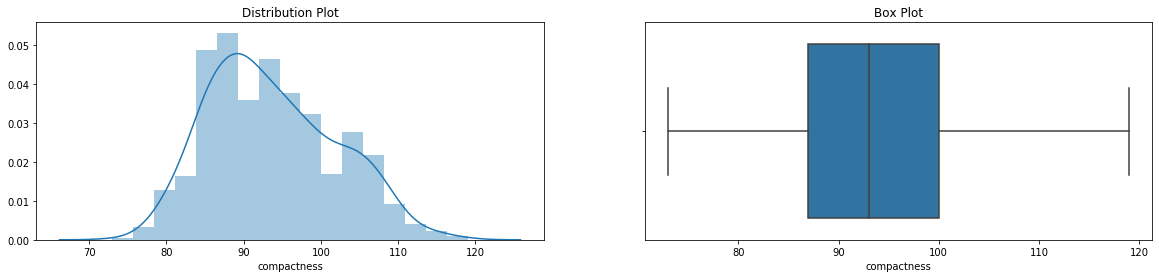

In [29]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in compactness column and it's looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

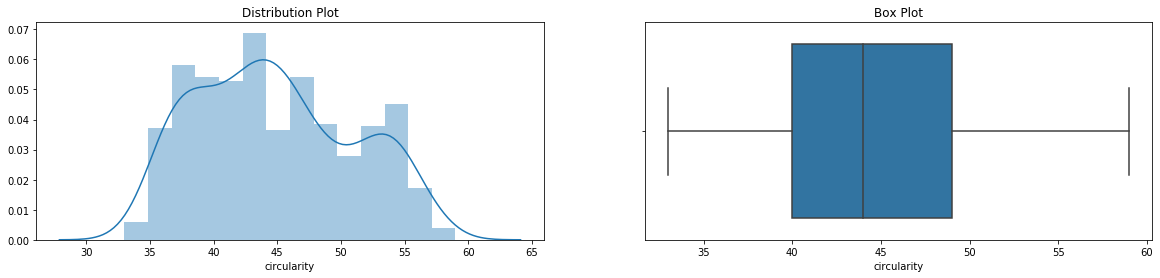

In [30]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in circularity column and it's looks like normally distributed

Text(0.5, 1.0, 'Box Plot')

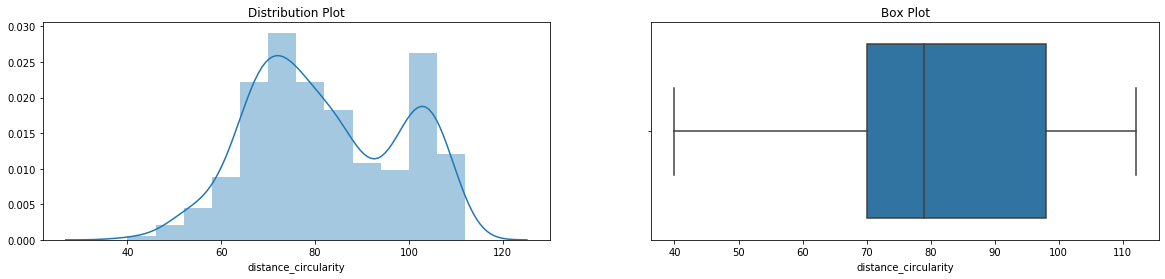

In [31]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

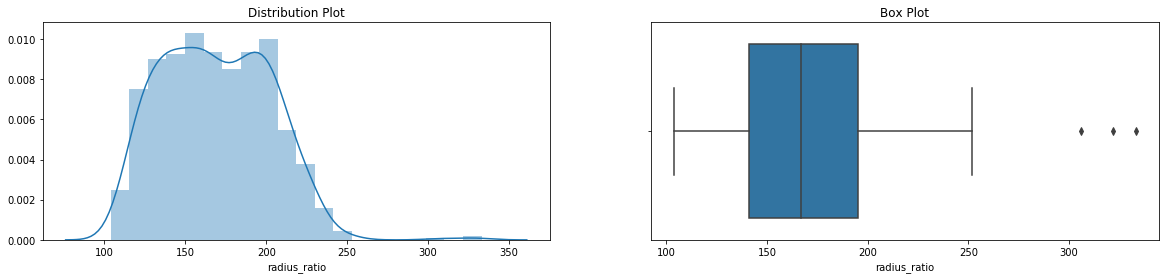

In [32]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median)

In [33]:
#check how many outliers are there in radius_ratio column
q1 = np.quantile(new_vehicle_df['radius_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['radius_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['radius_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius_ratio above",new_vehicle_df['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius_ratio column are",new_vehicle_df[new_vehicle_df['radius_ratio']>276]['radius_ratio'].shape[0])

Quartie1:: 141.0
Quartie2:: 167.0
Quartie3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3


Text(0.5, 1.0, 'Box Plot')

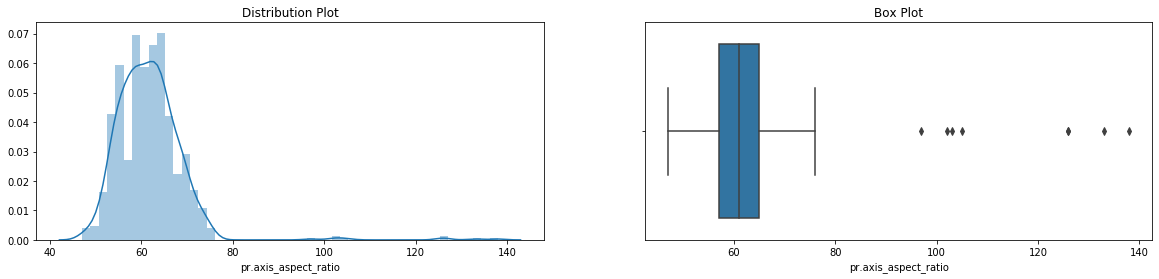

In [34]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [35]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",new_vehicle_df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


Text(0.5, 1.0, 'Box Plot')

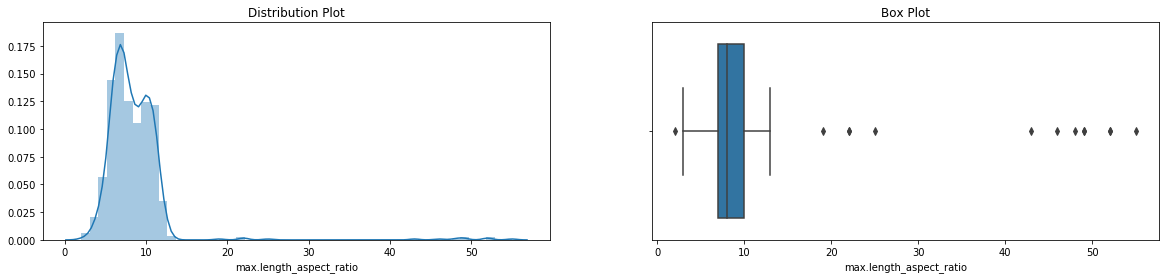

In [36]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median)

In [37]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",new_vehicle_df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",new_vehicle_df['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The above Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The below Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The above Outliers in max.length_aspect_ratio column are 12
The below Outliers in max.length_aspect_ratio column are 1


Text(0.5, 1.0, 'Box Plot')

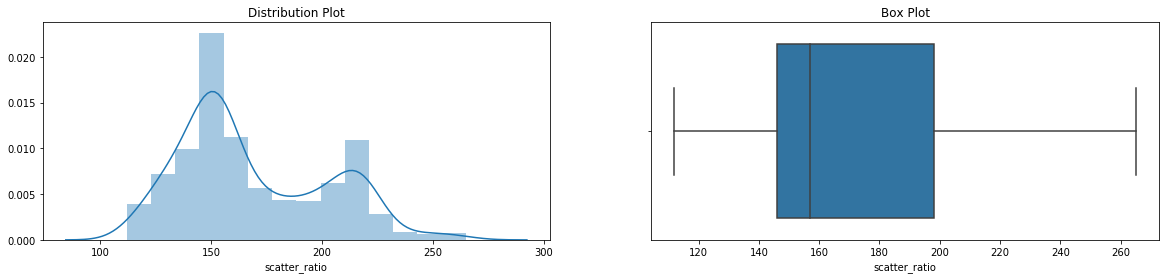

In [38]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

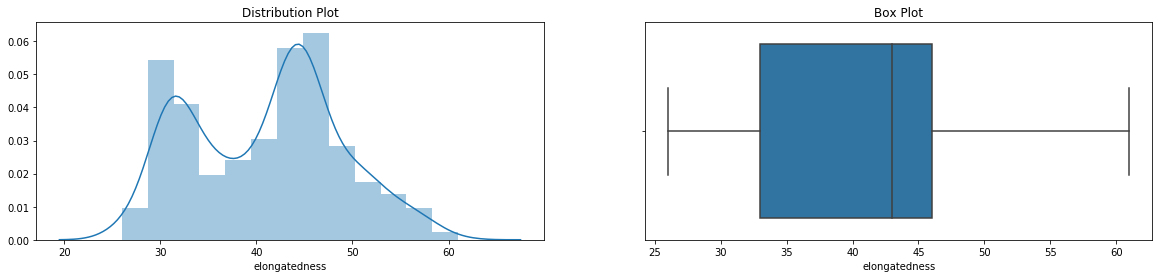

In [39]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

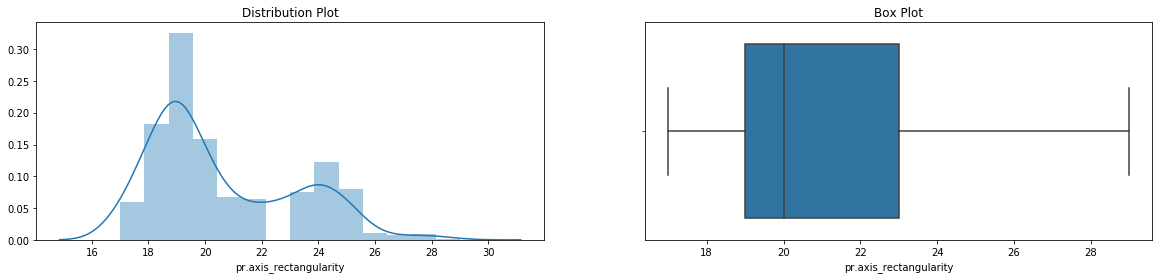

In [40]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

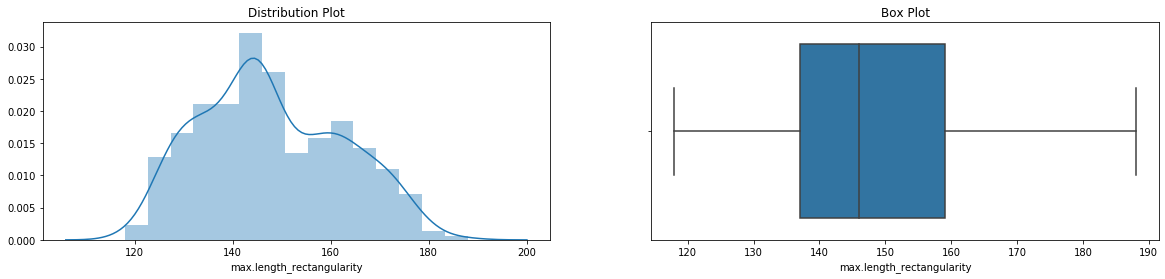

In [41]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

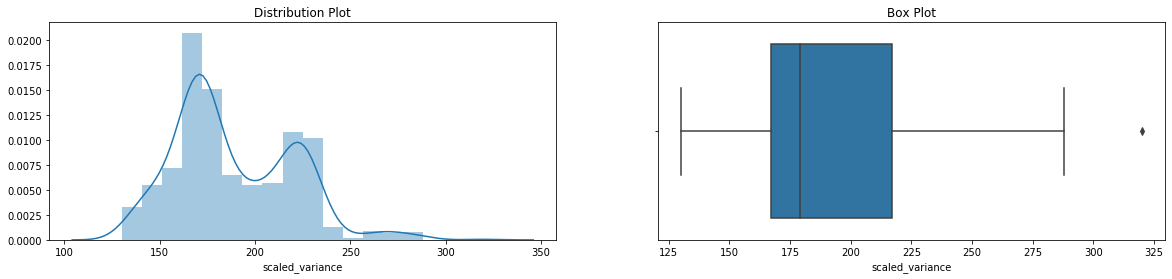

In [42]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [43]:
#check how many outliers are there in scaled_variance column
q1 = np.quantile(new_vehicle_df['scaled_variance'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",new_vehicle_df['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",new_vehicle_df[new_vehicle_df['scaled_variance']>292]['scaled_variance'].shape[0])

Quartie1:: 167.0
Quartie2:: 179.0
Quartie3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


Text(0.5, 1.0, 'Box Plot')

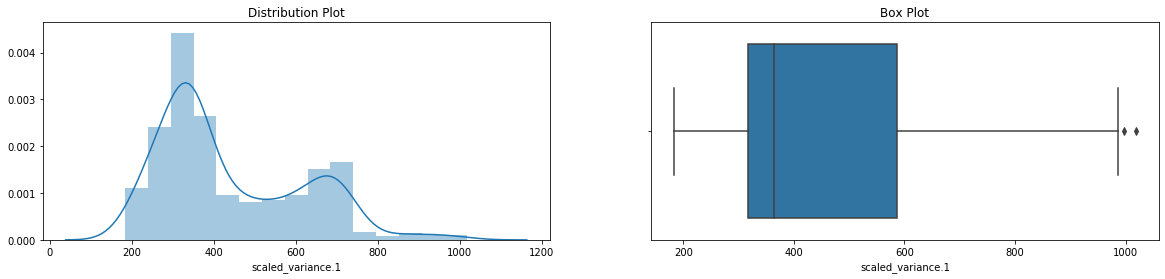

In [44]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [45]:
#check how many outliers are there in scaled_variance.1 column
q1 = np.quantile(new_vehicle_df['scaled_variance.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",new_vehicle_df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",new_vehicle_df[new_vehicle_df['scaled_variance.1']>988]['scaled_variance.1'].shape[0])

Quartie1:: 318.0
Quartie2:: 364.0
Quartie3:: 586.0
Inter Quartie Range:: 268.0
scaled_variance.1 above 988.0 are outliers
The Outliers in scaled_variance.1 column are 2


Text(0.5, 1.0, 'Box Plot')

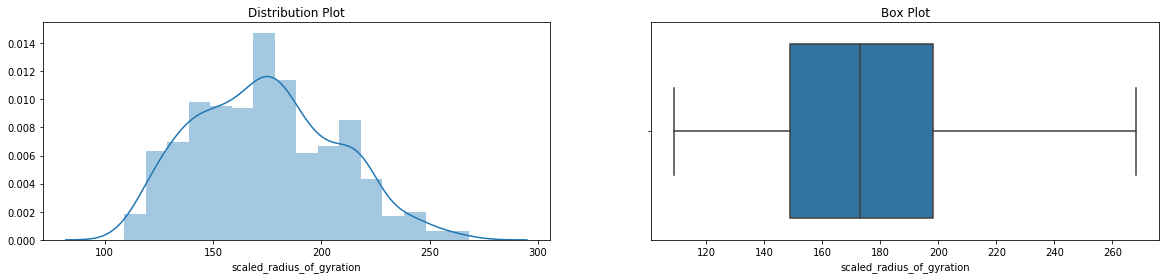

In [46]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

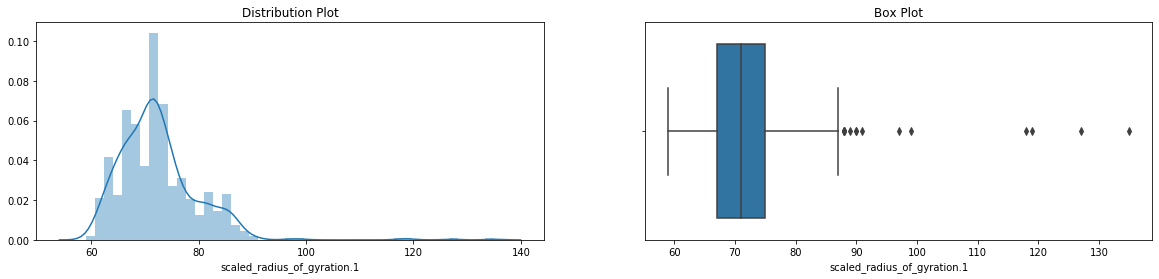

In [47]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median)

In [48]:
#check how many outliers are there in scaled_radius_of_gyration.1 column
q1 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",new_vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartie1:: 67.0
Quartie2:: 71.0
Quartie3:: 75.0
Inter Quartie Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


Text(0.5, 1.0, 'Box Plot')

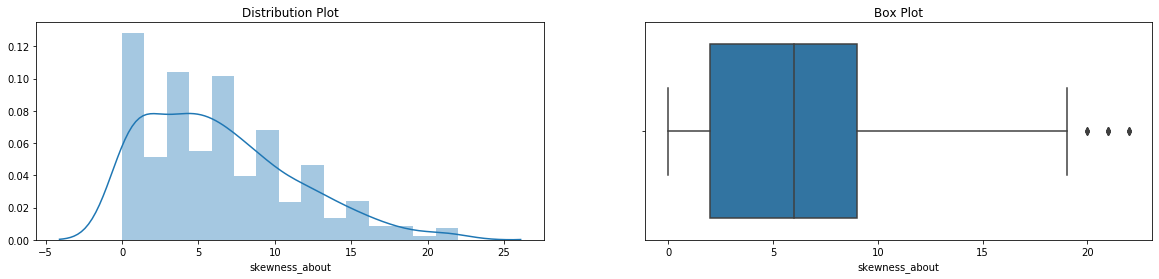

In [49]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median)

In [50]:
#check how many outliers are there in skewness_about column
q1 = np.quantile(new_vehicle_df['skewness_about'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about above",new_vehicle_df['skewness_about'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about column are",new_vehicle_df[new_vehicle_df['skewness_about']>19.5]['skewness_about'].shape[0])

Quartie1:: 2.0
Quartie2:: 6.0
Quartie3:: 9.0
Inter Quartie Range:: 7.0
skewness_about above 19.5 are outliers
The Outliers in skewness_about column are 12


Text(0.5, 1.0, 'Box Plot')

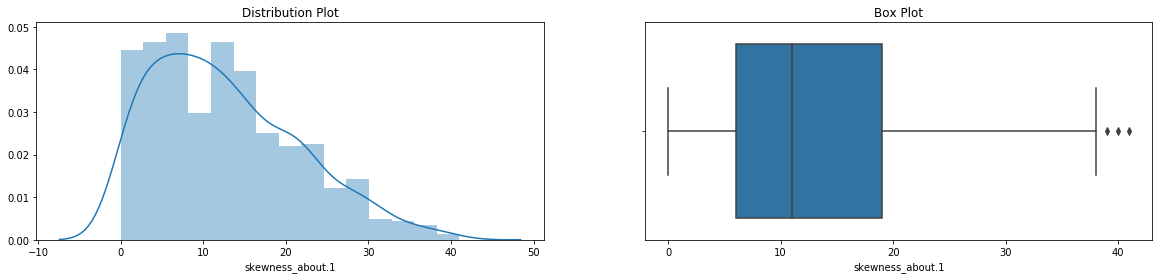

In [51]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

In [52]:
#check how many outliers are there in skewness_about.1 column
q1 = np.quantile(new_vehicle_df['skewness_about.1'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about.1'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",new_vehicle_df['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5]['skewness_about.1'].shape[0])

Quartie1:: 6.0
Quartie2:: 11.0
Quartie3:: 19.0
Inter Quartie Range:: 13.0
skewness_about.1 above 38.5 are outliers
The Outliers in skewness_about.1 column are 3


Text(0.5, 1.0, 'Box Plot')

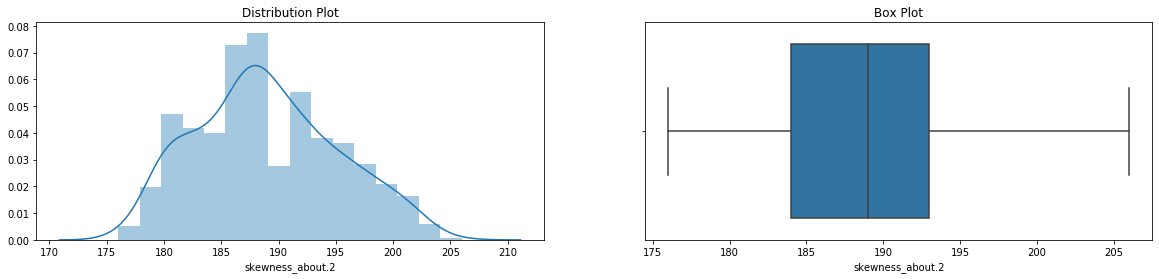

In [53]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

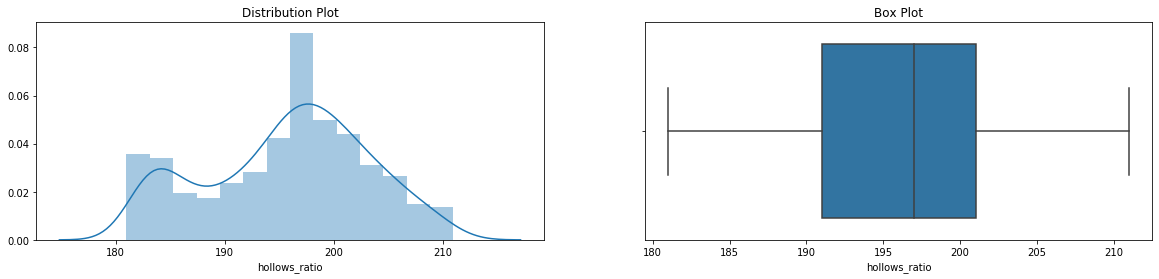

In [54]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median)

In [55]:
#display how many are car,bus,van. 
new_vehicle_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

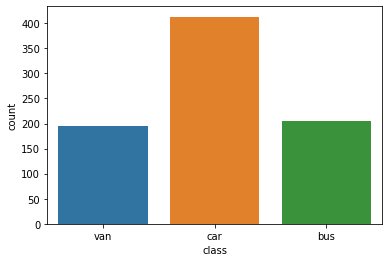

In [56]:
sns.countplot(new_vehicle_df['class'])
plt.show()

From above we can see that cars are most followed by bus and then vans.

so by now we analyze each column and we found that there are outliers in some column. now our next step is to know whether these outliers are natural or artificial. if natural then we have to do nothing but if these outliers are artificial then we have to handle these outliers. we have 8 columns in which we found outliers: ->radius_ratio ->pr.axis_aspect_ratio ->max.length_aspect_ratio ->scaled_variance ->scaled_variance.1 ->scaled_radius_of_gyration.1 ->skewness_about ->skewness_about.1

after seeing the max values of above outliers column. it's looks like outliers in above columns are natural not a typo mistake or artificial. Note: It's my assumption only. as there is no way to prove whether these outliers are natural or artificial. As we know that mostly algorithms are affected by outliers and outliers may affect the model.as we will apply SVM on above data which is affected by outliers. so better to drop those outliers.

# Fix Outliers after dropping missing values

In [57]:
#radius_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['radius_ratio']>276].index,axis=0,inplace=True)

In [58]:
#pr.axis_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)

In [59]:
#max.length_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)

In [60]:
#scaled_variance column outliers
new_vehicle_df[new_vehicle_df['scaled_variance']>292]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

from above we can see that scaled_variance column outliers has been removed

In [61]:
#scaled_variance.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_variance.1']>988].index,axis=0,inplace=True)

In [62]:
#scaled_radius_of_gyration.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)

In [63]:
#skewness_about column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about']>19.5].index,axis=0,inplace=True)

In [64]:
#skewness_about.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5].index,axis=0,inplace=True)

In [65]:
#now what is the shape of dataframe
print("after removing outliers shape of dataframe:",new_vehicle_df.shape)

after removing outliers shape of dataframe: (778, 19)


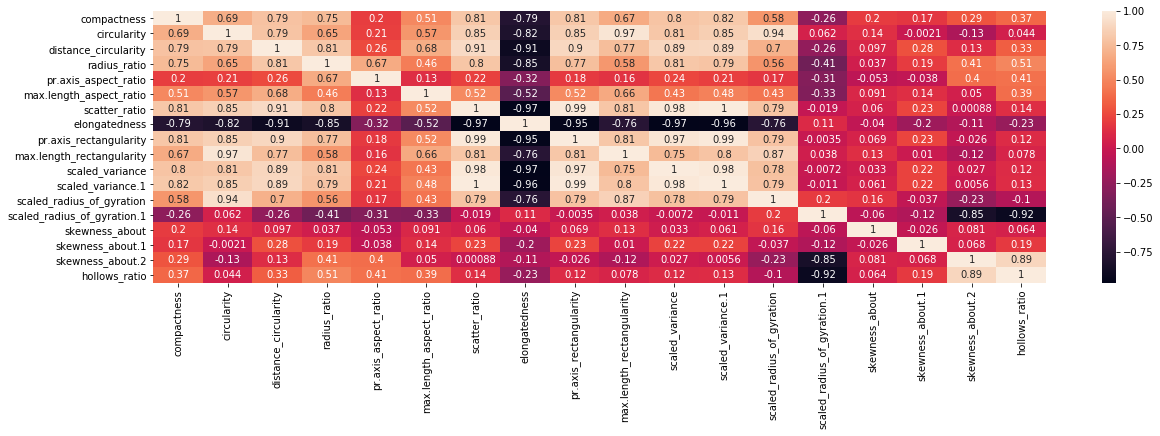

In [66]:
#find the correlation between independent variables
plt.figure(figsize=(20,5))
sns.heatmap(new_vehicle_df.corr(),annot=True)
plt.show()

so our objective is to reocgnize whether an object is a van or bus or car based on some input features. so our main assumption is there is little or no multicollinearity between the features. if two features is highly correlated then there is no use in using both features.in that case, we can drop one feature. so heatmap gives us the correlation matrix there we can see which features are highly correlated. From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has 1 correlation and many other features also there which having more than 0.9 correlation so we will drop those columns whose correlation is +-0.9 or above. so there are 8 such columns: ->max.length_rectangularity ->scaled_radius_of_gyration ->skewness_about.2 ->scatter_ratio ->elongatedness ->pr.axis_rectangularity ->scaled_variance ->scaled_variance.1 now, again we have two option we will drop those above eight columns manually or we will apply pca and let pca to be decided how it will explain above data which is in high dimension with smaller number of variables. we will see both approaches.

Principal Component Analysis is an unsupervised learning class of statistical techniques used to explain data in high dimension using small number of variables called the principal components. Principal components are the linear combinations of the original variables in the dataset. As it will explain high dimension data with small number of variables. The big disadvantage is we cannot do interpretation with the model.In other words model with pca will become blackbox. In pca first we have to find the covariance matrix after that from that covariance matrix we have to find eigen vectors and eigen values. There is mathematical way to find eigen vectors and eigen values. i will attach the link of how to find the eigen value and eigen vector. Corresponding to each eigen vector there is eigen value. after that we have to sort the eigen vector by decreasing eigen values and choose k eigen vectors with the largest eigen value.

# With Principal Component Analysis(PCA)

In [67]:
#now separate the dataframe into dependent and independent variables
new_vehicle_df_independent_attr = new_vehicle_df.drop('class',axis=1)
new_vehicle_df_dependent_attr = new_vehicle_df['class']
print("shape of new_vehicle_df_independent_attr::",new_vehicle_df_independent_attr.shape)
print("shape of new_vehicle_df_dependent_attr::",new_vehicle_df_dependent_attr.shape)

shape of new_vehicle_df_independent_attr:: (778, 18)
shape of new_vehicle_df_dependent_attr:: (778,)


In [68]:
#now sclaed the independent attribute and replace the dependent attr value with number
new_vehicle_df_independent_attr_scaled = new_vehicle_df_independent_attr.apply(zscore)
new_vehicle_df_dependent_attr.replace({'car':0,'bus':1,'van':2},inplace=True)

In [69]:
#make the covariance matrix and we have 18 independent features so aur covariance matrix is 18*18 matrix
cov_matrix = np.cov(new_vehicle_df_independent_attr_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00128700e+00  6.86247246e-01  7.87505293e-01  7.46771440e-01
   2.04939977e-01  5.12283067e-01  8.12881431e-01 -7.88349738e-01
   8.12905174e-01  6.73782504e-01  7.96401783e-01  8.19887792e-01
   5.76023344e-01 -2.65267720e-01  1.97487290e-01  1.69434494e-01
   2.92836011e-01  3.71157507e-01]
 [ 6.86247246e-01  1.00128700e+00  7.93336484e-01  6.46067365e-01
   2.10187939e-01  5.72687787e-01  8.55995384e-01 -8.20856804e-01
   8.55313028e-01  9.66703354e-01  8.15382274e-01  8.49756656e-01
   9.36901509e-01  6.21569802e-02  1.38644834e-01 -2.14108305e-03
  -1.26272800e-01  4.38549912e-02]
 [ 7.87505293e-01  7.93336484e-01  1.00128700e+00  8.15625667e-01
   2.57276757e-01  6.81069140e-01  9.10833561e-01 -9.11154567e-01
   9.00470612e-01  7.67926678e-01  8.91113878e-01  8.95421670e-01
   7.04373288e-01 -2.55844099e-01  9.69453477e-02  2.77271339e-01
   1.27935606e-01  3.33163683e-01]
 [ 7.46771440e-01  6.46067365e-01  8.15625667e-01  1.00128

In [70]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors
pca_to_learn_variance = PCA(n_components=18)
pca_to_learn_variance.fit(new_vehicle_df_independent_attr_scaled)

PCA(n_components=18)

In [71]:
#display explained variance ratio
pca_to_learn_variance.explained_variance_ratio_

array([5.47917208e-01, 1.85063633e-01, 6.64445772e-02, 6.41074844e-02,
       4.91803576e-02, 3.60021274e-02, 1.81384465e-02, 1.26936388e-02,
       6.15906674e-03, 4.25924846e-03, 3.23513418e-03, 2.24281296e-03,
       1.49652817e-03, 1.17583823e-03, 8.60586176e-04, 6.67254264e-04,
       3.36385506e-04, 1.96724486e-05])

In [72]:
#display explained variance
pca_to_learn_variance.explained_variance_

array([9.87520281e+00, 3.33543258e+00, 1.19754165e+00, 1.15541983e+00,
       8.86385749e-01, 6.48872319e-01, 3.26912233e-01, 2.28779559e-01,
       1.11005882e-01, 7.67651421e-02, 5.83073605e-02, 4.04225904e-02,
       2.69721757e-02, 2.11923277e-02, 1.55104875e-02, 1.20260344e-02,
       6.06273182e-03, 3.54559807e-04])

In [73]:
#display principal components
pca_to_learn_variance.components_

array([[ 2.70963937e-01,  2.85498616e-01,  3.00756696e-01,
         2.73648012e-01,  1.02876273e-01,  1.98762043e-01,
         3.09692679e-01, -3.07017506e-01,  3.06820802e-01,
         2.74168749e-01,  3.02498907e-01,  3.07162213e-01,
         2.59825044e-01, -5.01854837e-02,  3.53690148e-02,
         6.32634323e-02,  3.55974003e-02,  8.81040107e-02],
       [-8.72522599e-02,  1.43599934e-01, -4.16504206e-02,
        -1.98016825e-01, -2.51189765e-01, -8.25042940e-02,
         7.14270483e-02, -1.09817948e-02,  8.47209207e-02,
         1.31005476e-01,  6.74747787e-02,  7.47652392e-02,
         2.10158848e-01,  5.05191356e-01, -1.54690345e-02,
        -8.14686691e-02, -5.08122400e-01, -5.06717268e-01],
       [-2.24781542e-02, -2.12492148e-01,  6.81966354e-02,
         5.12261099e-02, -1.00850129e-01, -1.68740481e-01,
         1.13838973e-01, -9.67003862e-02,  1.11506102e-01,
        -2.31363392e-01,  1.47774860e-01,  1.17721336e-01,
        -2.15281029e-01,  7.46102368e-02, -5.08187752e

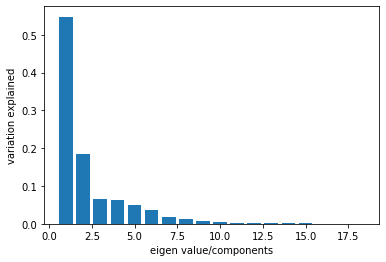

In [74]:
plt.bar(list(range(1,19)),pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

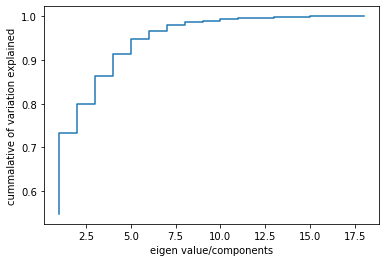

In [75]:
plt.step(list(range(1,19)),np.cumsum(pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

From above we can see that 8 dimension are able to explain 95%variance of data. so we will use first 8 principal components

In [76]:
#use first 8 principal components
pca_eight_components = PCA(n_components=8)
pca_eight_components.fit(new_vehicle_df_independent_attr_scaled)

PCA(n_components=8)

In [77]:
#transform the raw data which is in 18 dimension into 8 new dimension with pca
new_vehicle_df_pca_independent_attr = pca_eight_components.transform(new_vehicle_df_independent_attr_scaled)

In [78]:
#display the shape of new_vehicle_df_pca_independent_attr
new_vehicle_df_pca_independent_attr.shape

(778, 8)

now before apply pca with 8 dimension which are explaining more than 95% variantion of data we will make model on raw data after that we will make model with pca and then we will compare both models.

In [79]:
#now split the data into 80:20 ratio
rawdata_X_train,rawdata_X_test,rawdata_y_train,rawdata_y_test = train_test_split(new_vehicle_df_independent_attr_scaled,new_vehicle_df_dependent_attr,test_size=0.20,random_state=1)
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(new_vehicle_df_pca_independent_attr,new_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [80]:
print("shape of rawdata_X_train",rawdata_X_train.shape)
print("shape of rawdata_y_train",rawdata_y_train.shape)
print("shape of rawdata_X_test",rawdata_X_test.shape)
print("shape of rawdata_y_test",rawdata_y_test.shape)
print("--------------------------------------------")
print("shape of pca_X_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_X_test",pca_X_test.shape)
print("shape of pca_y_test",pca_y_test.shape)

shape of rawdata_X_train (622, 18)
shape of rawdata_y_train (622,)
shape of rawdata_X_test (156, 18)
shape of rawdata_y_test (156,)
--------------------------------------------
shape of pca_X_train (622, 8)
shape of pca_y_train (622,)
shape of pca_X_test (156, 8)
shape of pca_y_test (156,)


In [81]:
#now we will train the model with both raw data and pca data with new dimension
svc = SVC() #instantiate the object

In [82]:
#fit the model on raw data
svc.fit(rawdata_X_train,rawdata_y_train)

SVC()

In [83]:
#predict the y value
rawdata_y_predict = svc.predict(rawdata_X_test)

In [84]:
#now fit the model on pca data with new dimension
svc.fit(pca_X_train,pca_y_train)

SVC()

In [85]:
#predict the y value
pca_y_predict = svc.predict(pca_X_test)

In [86]:
#display accuracy score of both models
print("Accuracy score with raw data(18 dimension)",accuracy_score(rawdata_y_test,rawdata_y_predict))
print("Accuracy score with pca data(8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Accuracy score with raw data(18 dimension) 0.9615384615384616
Accuracy score with pca data(8 dimension) 0.9487179487179487


From above we can see that by reducing 10 dimension we are achieving 94% accuracy

In [87]:
#display confusion matrix of both models
print("Confusion matrix with raw data(18 dimension)\n",confusion_matrix(rawdata_y_test,rawdata_y_predict))
print("Confusion matrix with pca data(8 dimension)\n",confusion_matrix(pca_y_test,pca_y_predict))

Confusion matrix with raw data(18 dimension)
 [[87  0  4]
 [ 0 38  1]
 [ 1  0 25]]
Confusion matrix with pca data(8 dimension)
 [[85  2  4]
 [ 0 38  1]
 [ 1  0 25]]


# With dropping the above mentioned columns Manually

In [88]:
#drop the columns
new_vehicle_df_independent_attr_scaled.drop(['max.length_rectangularity','scaled_radius_of_gyration','skewness_about.2','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1'],axis=1,inplace=True)

In [89]:
#display the shape of new dataframe
new_vehicle_df_independent_attr_scaled.shape

(778, 10)

In [90]:
dropcolumn_X_train,dropcolumn_X_test,dropcolumn_y_train,dropcolumn_y_test = train_test_split(new_vehicle_df_independent_attr_scaled,new_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [91]:
print("shape of dropcolumn_X_train",dropcolumn_X_train.shape)
print("shape of dropcolumn_y_train",dropcolumn_y_train.shape)
print("shape of dropcolumn_X_test",dropcolumn_X_test.shape)
print("shape of dropcolumn_y_test",dropcolumn_y_test.shape)

shape of dropcolumn_X_train (622, 10)
shape of dropcolumn_y_train (622,)
shape of dropcolumn_X_test (156, 10)
shape of dropcolumn_y_test (156,)


In [92]:
#fit the model on dropcolumn_X_train,dropcolumn_y_train
svc.fit(dropcolumn_X_train,dropcolumn_y_train)

SVC()

In [93]:
#predict the y value
dropcolumn_y_predict = svc.predict(dropcolumn_X_test)

In [94]:
#display the accuracy score and confusion matrix
print("Accuracy score with dropcolumn data(10 dimension)",accuracy_score(dropcolumn_y_test,dropcolumn_y_predict))
print("Confusion matrix with dropcolumn data(10 dimension)\n",confusion_matrix(dropcolumn_y_test,dropcolumn_y_predict))

Accuracy score with dropcolumn data(10 dimension) 0.9423076923076923
Confusion matrix with dropcolumn data(10 dimension)
 [[85  1  5]
 [ 0 38  1]
 [ 1  1 24]]


# Imputing missing values

In [95]:
#create a new dataframe
impute_vehicle_df = vehicle_df.copy()

In [96]:
#display the first 5 rows of dataframe
impute_vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [97]:
#display the shape of dataframe
impute_vehicle_df.shape

(846, 19)

In [98]:
#display the information of dataframe
impute_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

From above we can see that there are null values in some column.now we will impute those null values.

In [99]:
#display 5 point summary
impute_vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

From above 5 point summary it's looks like we can impute with median.again by imputing the missing values with median we are changing the shape of distribution and introducing bias.but it's might be better than drpping missing values.

In [100]:
impute_vehicle_df.fillna(impute_vehicle_df.median(),axis=0,inplace=True)

In [101]:
#display the info of dataframe
impute_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

From above we can see that there are no null values in each column

In [102]:
#display 5 point summary after imputation 
impute_vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

# Analysis of each column with the help of plots

Text(0.5, 1.0, 'Box Plot')

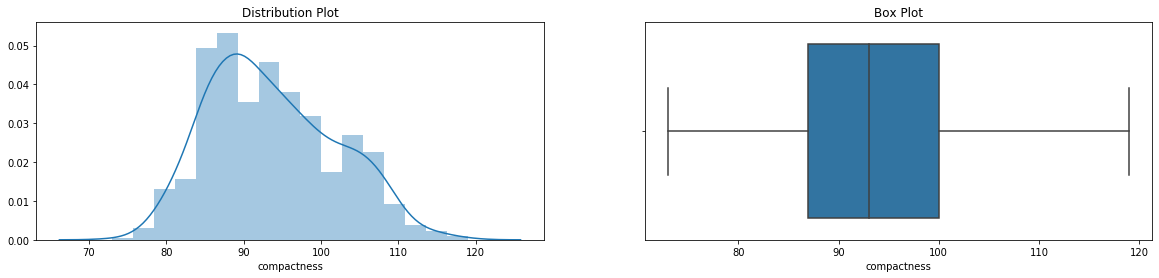

In [103]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in compactness column and it's looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

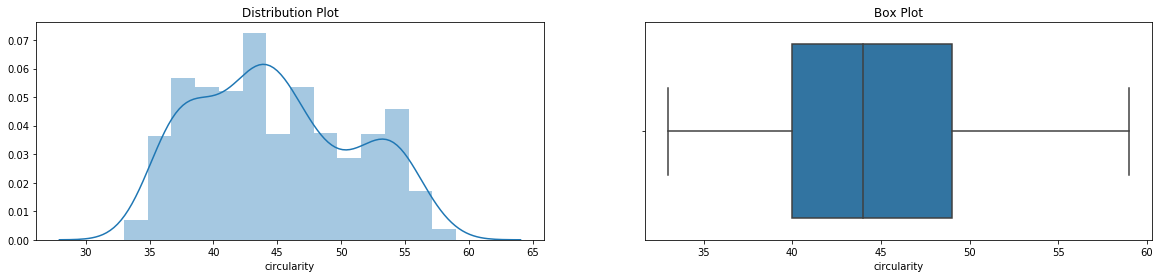

In [104]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in circularity column and it's looks like normally distributed

Text(0.5, 1.0, 'Box Plot')

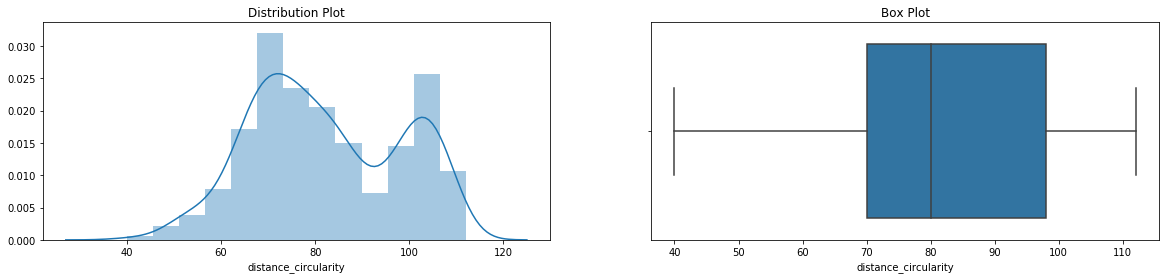

In [105]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

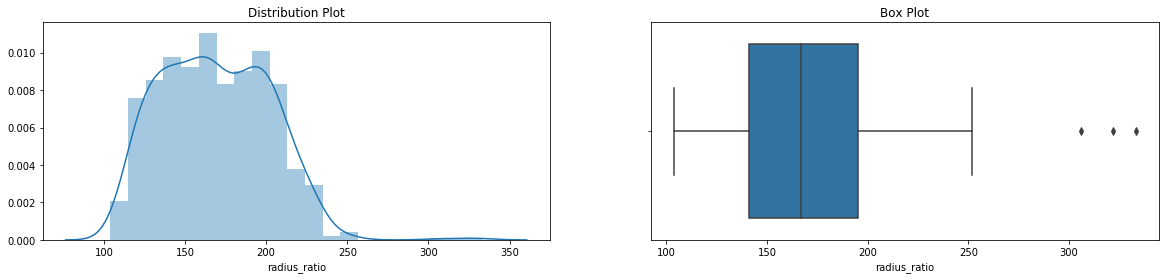

In [106]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median)

In [107]:
#check how many outliers are there in radius_ratio column
q1 = np.quantile(impute_vehicle_df['radius_ratio'],0.25)
q2 = np.quantile(impute_vehicle_df['radius_ratio'],0.50)
q3 = np.quantile(impute_vehicle_df['radius_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius_ratio above",impute_vehicle_df['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius_ratio column are",impute_vehicle_df[impute_vehicle_df['radius_ratio']>276]['radius_ratio'].shape[0])

Quartie1:: 141.0
Quartie2:: 167.0
Quartie3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3


Text(0.5, 1.0, 'Box Plot')

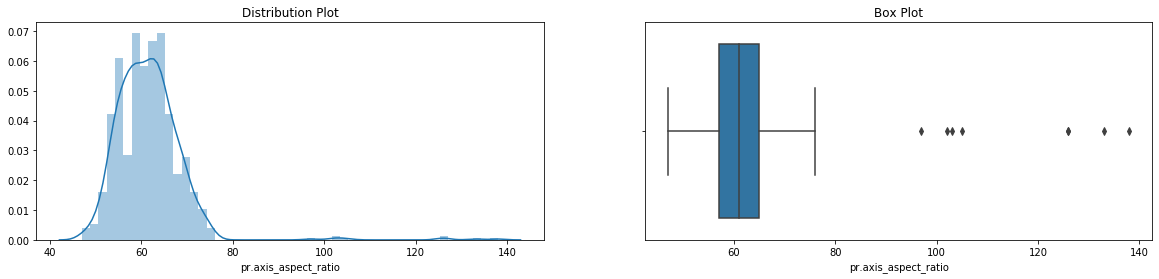

In [108]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")


From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median)

In [109]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(impute_vehicle_df['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(impute_vehicle_df['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(impute_vehicle_df['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",impute_vehicle_df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",impute_vehicle_df[impute_vehicle_df['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


Text(0.5, 1.0, 'Box Plot')

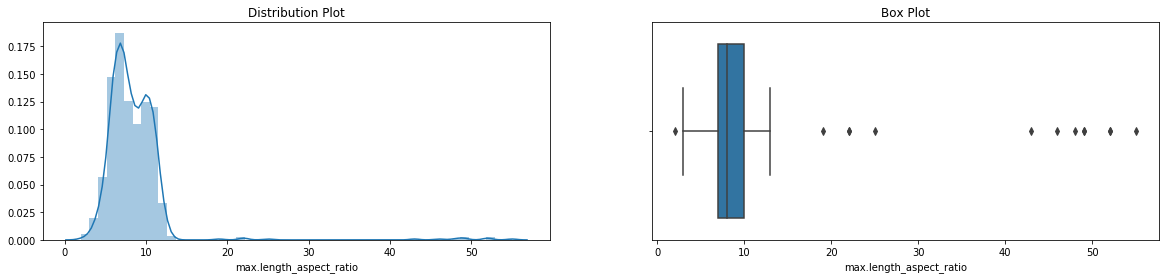

In [110]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median)

In [111]:
#check how many outliers are there in max.length_aspect_ratio column
q1 = np.quantile(impute_vehicle_df['max.length_aspect_ratio'],0.25)
q2 = np.quantile(impute_vehicle_df['max.length_aspect_ratio'],0.50)
q3 = np.quantile(impute_vehicle_df['max.length_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",impute_vehicle_df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",impute_vehicle_df['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The above Outliers in max.length_aspect_ratio column are",impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The below Outliers in max.length_aspect_ratio column are",impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The above Outliers in max.length_aspect_ratio column are 12
The below Outliers in max.length_aspect_ratio column are 1


Text(0.5, 1.0, 'Box Plot')

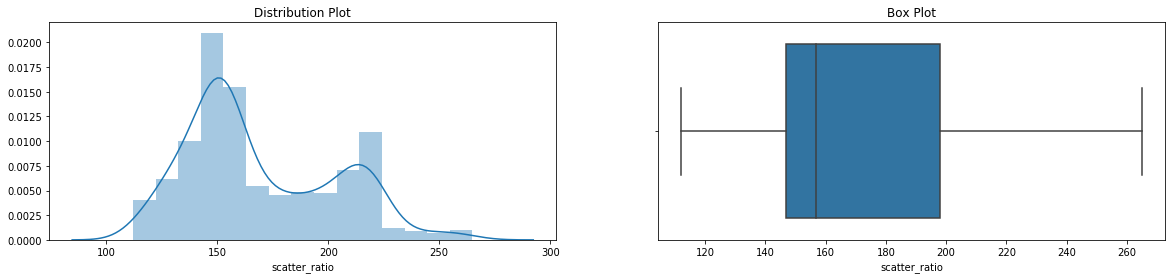

In [112]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

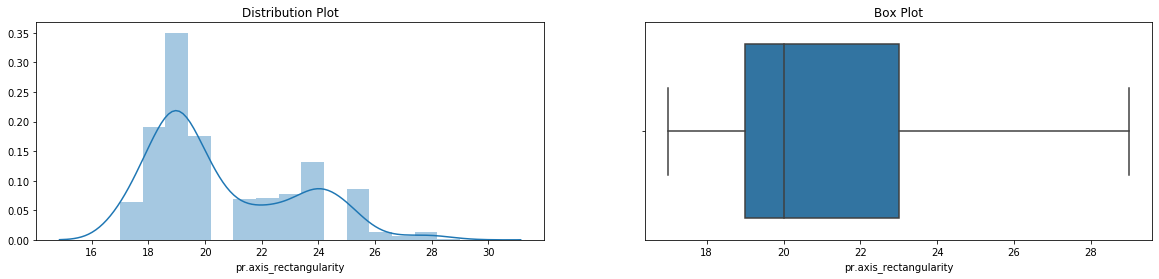

In [114]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

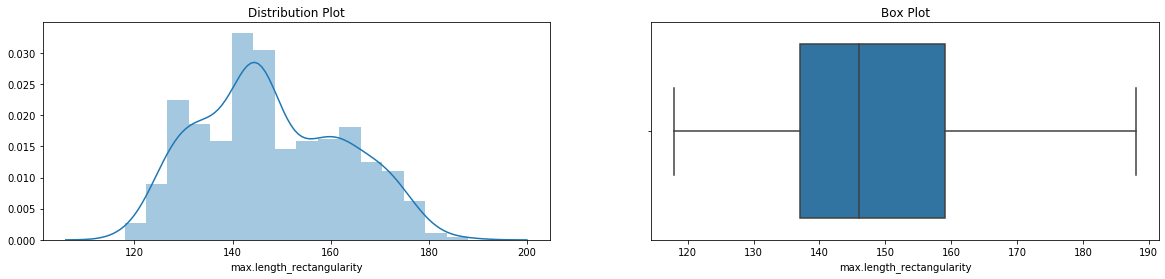

In [115]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

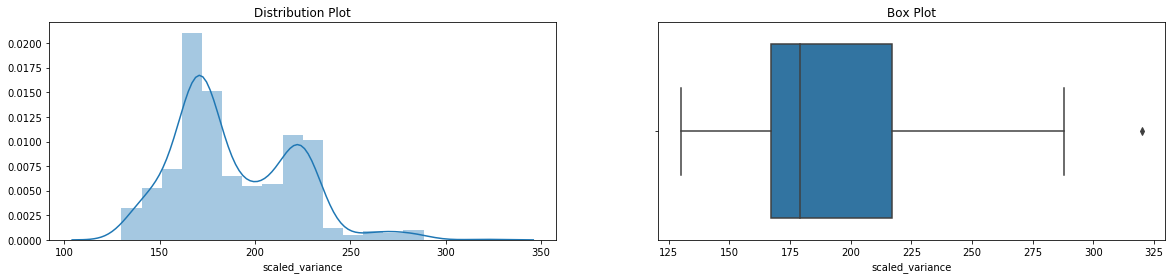

In [116]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [117]:
#check how many outliers are there in scaled_variance column
q1 = np.quantile(impute_vehicle_df['scaled_variance'],0.25)
q2 = np.quantile(impute_vehicle_df['scaled_variance'],0.50)
q3 = np.quantile(impute_vehicle_df['scaled_variance'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",impute_vehicle_df['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",impute_vehicle_df[impute_vehicle_df['scaled_variance']>292]['scaled_variance'].shape[0])

Quartie1:: 167.0
Quartie2:: 179.0
Quartie3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


Text(0.5, 1.0, 'Box Plot')

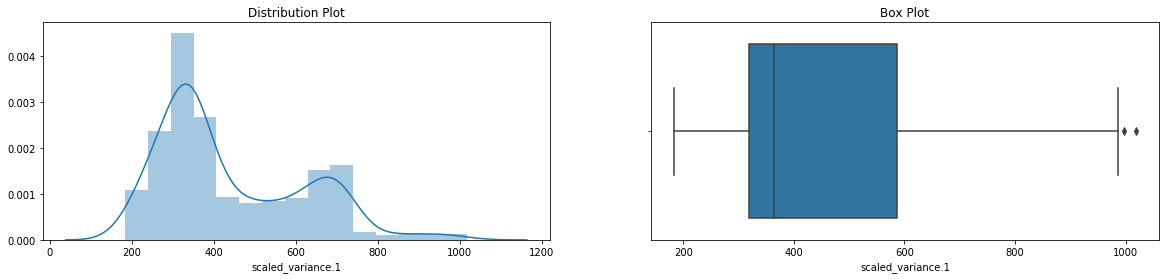

In [118]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [119]:
#check how many outliers are there in scaled_variance.1 column
q1 = np.quantile(impute_vehicle_df['scaled_variance.1'],0.25)
q2 = np.quantile(impute_vehicle_df['scaled_variance.1'],0.50)
q3 = np.quantile(impute_vehicle_df['scaled_variance.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",impute_vehicle_df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",impute_vehicle_df[impute_vehicle_df['scaled_variance.1']>989.5]['scaled_variance.1'].shape[0])


Quartie1:: 318.25
Quartie2:: 363.5
Quartie3:: 586.75
Inter Quartie Range:: 268.5
scaled_variance.1 above 989.5 are outliers
The Outliers in scaled_variance.1 column are 2


Text(0.5, 1.0, 'Box Plot')

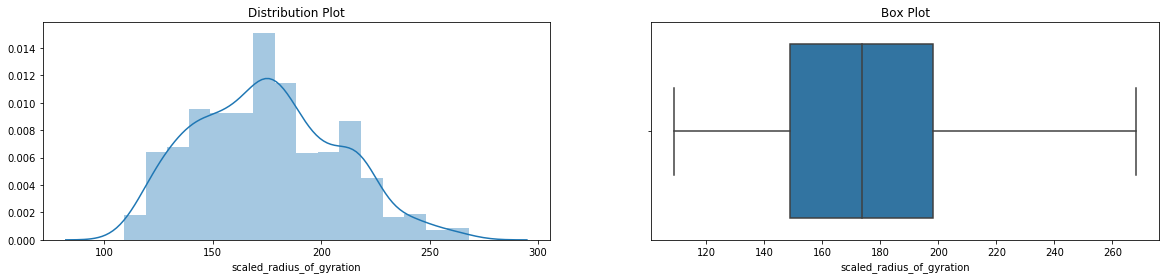

In [120]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

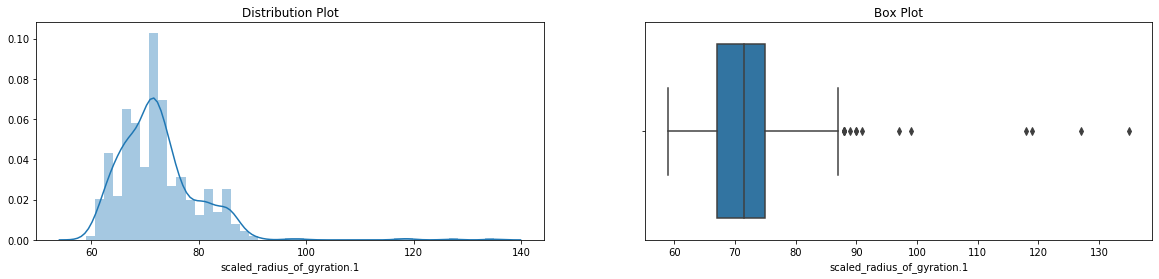

In [121]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median)

In [122]:
#check how many outliers are there in scaled_radius_of_gyration.1 column
q1 = np.quantile(impute_vehicle_df['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(impute_vehicle_df['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(impute_vehicle_df['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",impute_vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",impute_vehicle_df[impute_vehicle_df['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartie1:: 67.0
Quartie2:: 71.5
Quartie3:: 75.0
Inter Quartie Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


Text(0.5, 1.0, 'Box Plot')

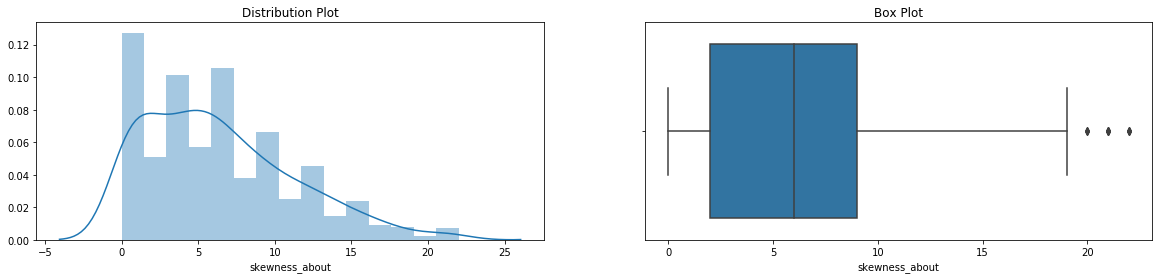

In [123]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median)

In [124]:
#check how many outliers are there in skewness_about column
q1 = np.quantile(impute_vehicle_df['skewness_about'],0.25)
q2 = np.quantile(impute_vehicle_df['skewness_about'],0.50)
q3 = np.quantile(impute_vehicle_df['skewness_about'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about above",impute_vehicle_df['skewness_about'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about column are",impute_vehicle_df[impute_vehicle_df['skewness_about']>19.5]['skewness_about'].shape[0])

Quartie1:: 2.0
Quartie2:: 6.0
Quartie3:: 9.0
Inter Quartie Range:: 7.0
skewness_about above 19.5 are outliers
The Outliers in skewness_about column are 12


Text(0.5, 1.0, 'Box Plot')

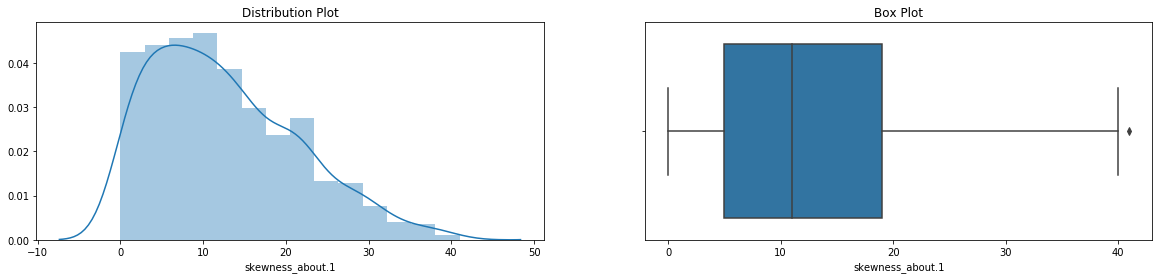

In [125]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side(mean>median)

In [126]:
#check how many outliers are there in skewness_about.1 column
q1 = np.quantile(impute_vehicle_df['skewness_about.1'],0.25)
q2 = np.quantile(impute_vehicle_df['skewness_about.1'],0.50)
q3 = np.quantile(impute_vehicle_df['skewness_about.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",impute_vehicle_df['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",impute_vehicle_df[impute_vehicle_df['skewness_about.1']>40]['skewness_about.1'].shape[0])

Quartie1:: 5.0
Quartie2:: 11.0
Quartie3:: 19.0
Inter Quartie Range:: 14.0
skewness_about.1 above 40.0 are outliers
The Outliers in skewness_about.1 column are 1


Text(0.5, 1.0, 'Box Plot')

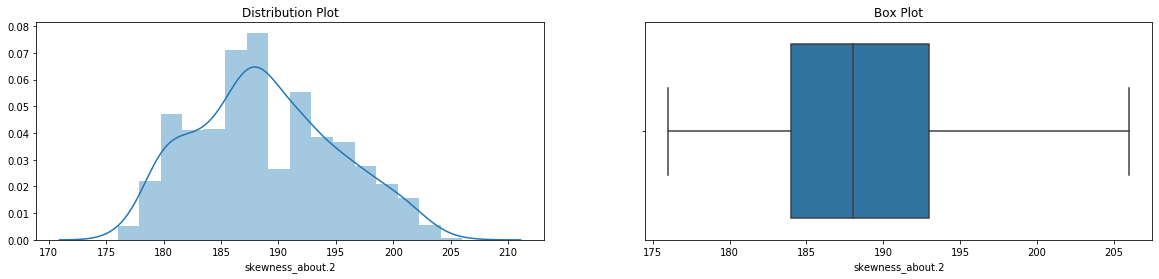

In [127]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

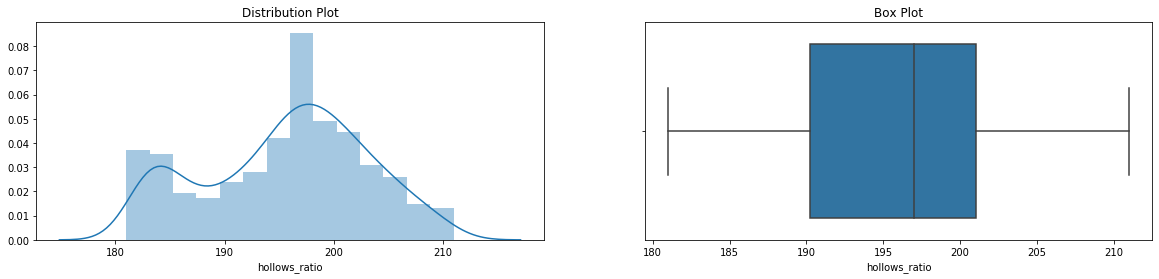

In [128]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median)

In [129]:
impute_vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

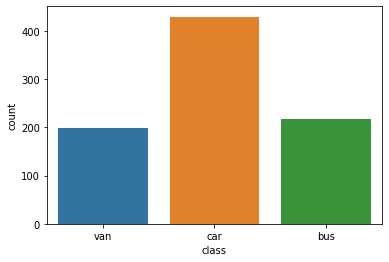

In [130]:
sns.countplot(impute_vehicle_df['class'])
plt.show()

so by now we analyze each column and we found that there are outliers in some column. now our next step is to know whether these outliers are natural or artificial. if natural then we have to do nothing but if these outliers are artificial then we have to handle these outliers. we have 8 columns in which we found outliers: ->radius_ratio ->pr.axis_aspect_ratio ->max.length_aspect_ratio ->scaled_variance ->scaled_variance.1 ->scaled_radius_of_gyration.1 ->skewness_about ->skewness_about.1

after seeing the max values of above outliers column. it's looks like outliers in above columns are natural not a typo mistake or artificial. as we will apply SVM on above data which is affected by outliers. so better to drop those outliers.

# Fix Outliers after imputing missing values

In [131]:
#radius_ratio column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['radius_ratio']>276].index,axis=0,inplace=True)

In [132]:
#pr.axis_aspect_ratio column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)

In [133]:
#max.length_aspect_ratio column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)

In [134]:
#scaled_variance column outliers
impute_vehicle_df[impute_vehicle_df['scaled_variance']>292]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [135]:
#scaled_variance.1 column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['scaled_variance.1']>989.5].index,axis=0,inplace=True)

In [136]:
#scaled_radius_of_gyration.1 column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)

In [137]:
#skewness_about column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['skewness_about']>19.5].index,axis=0,inplace=True)

In [138]:
#skewness_about.1 column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['skewness_about.1']>40].index,axis=0,inplace=True)

In [139]:
#display the shape of data frame
print("after fixing outliers shape of dataframe:",impute_vehicle_df.shape)

after fixing outliers shape of dataframe: (813, 19)


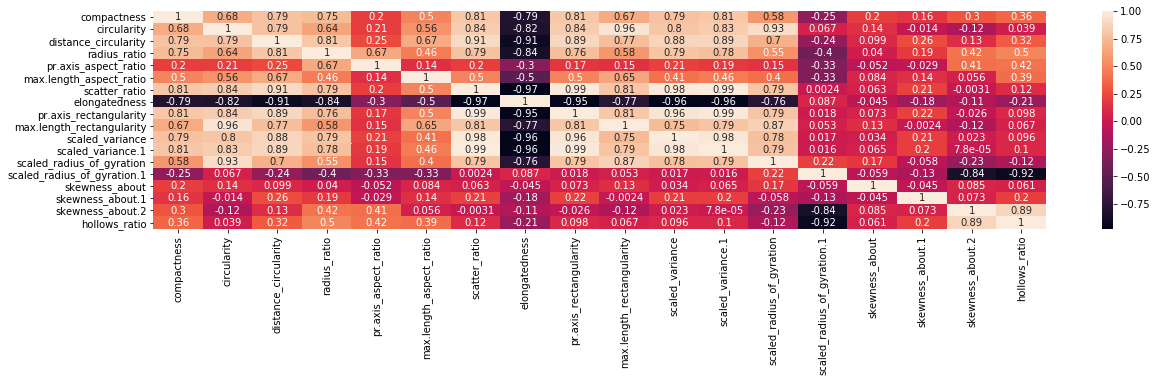

In [140]:
plt.figure(figsize=(20,4))
sns.heatmap(impute_vehicle_df.corr(),annot=True)
plt.show()

so our objective is to reocgnize whether an object is a van or bus or car based on some input features. so our main assumption is there is little or no multicollinearity between the features. if two features is highly correlated then there is no use in using both features.in that case, we can drop one feature. so heatmap gives us the correlation matrix there we can see which features are highly correlated. From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has 1 correlation and many other features also there which having more than 0.9 correlation so we will drop those columns whose correlation is +-0.9 or above. so there are 8 such columns: ->max.length_rectangularity ->scaled_radius_of_gyration ->skewness_about.2 ->scatter_ratio ->elongatedness ->pr.axis_rectangularity ->scaled_variance ->scaled_variance.1 now, again we have two option we will drop those above eight columns manually or we will apply pca and let pca to be decided how it will explain above data which is in high dimension with smaller number of variables. we will see both approaches.

# With Principal Component Analysis(PCA)

In [141]:
#now separate the dataframe into dependent and independent variables
impute_vehicle_df_independent_attr = impute_vehicle_df.drop('class',axis=1)
impute_vehicle_df_dependent_attr = impute_vehicle_df['class']
print("shape of impute_vehicle_df_independent_attr::",impute_vehicle_df_independent_attr.shape)
print("shape of impute_vehicle_df_dependent_attr::",impute_vehicle_df_dependent_attr.shape)

shape of impute_vehicle_df_independent_attr:: (813, 18)
shape of impute_vehicle_df_dependent_attr:: (813,)


In [142]:
#now scaled the independent attribute and replace the dependent attr value with number
impute_vehicle_df_independent_attr_scaled = impute_vehicle_df_independent_attr.apply(zscore)
impute_vehicle_df_dependent_attr.replace({'car':0,'bus':1,'van':2},inplace=True)

In [143]:
#make the covariance matrix and we have 18 independent features so aur covariance matrix is 18*18 matrix
impute_cov_matrix = np.cov(impute_vehicle_df_independent_attr_scaled,rowvar=False)
print("Impute cov_matrix shape:",impute_cov_matrix.shape)
print("Impute Covariance_matrix",impute_cov_matrix)

Impute cov_matrix shape: (18, 18)
Impute Covariance_matrix [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.0932662

In [144]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors
impute_pca_to_learn_variance = PCA(n_components=18)
impute_pca_to_learn_variance.fit(impute_vehicle_df_independent_attr_scaled)

PCA(n_components=18)

In [145]:
#display explained variance ratio
impute_pca_to_learn_variance.explained_variance_ratio_

array([5.43385012e-01, 1.87386253e-01, 6.70690992e-02, 6.30665320e-02,
       4.97324675e-02, 3.65268566e-02, 1.79255090e-02, 1.25904175e-02,
       6.25572293e-03, 4.22850947e-03, 3.43129149e-03, 2.45487103e-03,
       1.66416799e-03, 1.48558789e-03, 1.07943424e-03, 9.83188815e-04,
       5.61620004e-04, 1.73459006e-04])

In [146]:
#display explained variance
impute_pca_to_learn_variance.explained_variance_

array([9.79297570e+00, 3.37710644e+00, 1.20873054e+00, 1.13659560e+00,
       8.96286859e-01, 6.58293128e-01, 3.23056525e-01, 2.26906613e-01,
       1.12741686e-01, 7.62069059e-02, 6.18393099e-02, 4.42420969e-02,
       2.99919142e-02, 2.67735138e-02, 1.94537446e-02, 1.77191935e-02,
       1.01216098e-02, 3.12610726e-03])

In [147]:
#display principal components
impute_pca_to_learn_variance.components_

array([[ 2.72251046e-01,  2.85370045e-01,  3.01486231e-01,
         2.72594510e-01,  9.85797647e-02,  1.94755787e-01,
         3.10518442e-01, -3.08438338e-01,  3.07548493e-01,
         2.76301073e-01,  3.02748114e-01,  3.07040626e-01,
         2.61520489e-01, -4.36323635e-02,  3.67057041e-02,
         5.88504115e-02,  3.48373860e-02,  8.28136172e-02],
       [-8.97284818e-02,  1.33173937e-01, -4.40259591e-02,
        -2.04232234e-01, -2.59136858e-01, -9.45756320e-02,
         7.23350799e-02, -1.16876769e-02,  8.40915278e-02,
         1.25836631e-01,  7.01998575e-02,  7.79336637e-02,
         2.09927277e-01,  5.03914450e-01, -1.45682524e-02,
        -9.33980545e-02, -5.01664210e-01, -5.06546563e-01],
       [-2.26045073e-02, -2.10809943e-01,  7.08780817e-02,
         4.02139629e-02, -1.14805227e-01, -1.39313484e-01,
         1.12924698e-01, -9.00330455e-02,  1.11063547e-01,
        -2.19877688e-01,  1.44818765e-01,  1.15323952e-01,
        -2.13627435e-01,  6.73920886e-02, -5.21623444e

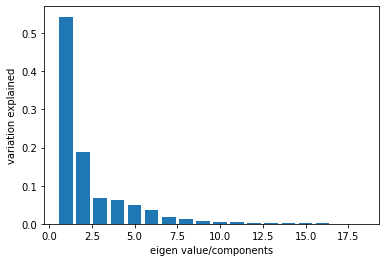

In [148]:
plt.bar(list(range(1,19)),impute_pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

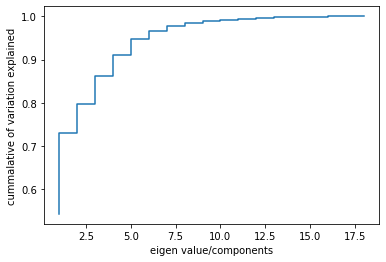

In [149]:
plt.step(list(range(1,19)),np.cumsum(impute_pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

From above we can see that 8 dimension are able to explain 95%variance of data. so we will use first 8 principal components

In [150]:
#use first 8 principal components
impute_pca_eight_components = PCA(n_components=8)
impute_pca_eight_components.fit(impute_vehicle_df_independent_attr_scaled)

PCA(n_components=8)

In [151]:
#transform the impute raw data which is in 18 dimension into 8 new dimension with pca
impute_vehicle_df_pca_independent_attr = impute_pca_eight_components.transform(impute_vehicle_df_independent_attr_scaled)

In [152]:
#display the shape of new_vehicle_df_pca_independent_attr
impute_vehicle_df_pca_independent_attr.shape

(813, 8)

now before apply pca with 8 dimension which are explaining more than 95% variantion of data we will make model on raw data after that we will make model with pca and then we will compare both models.

In [153]:
#now split the data into 80:20 ratio
impute_rawdata_X_train,impute_rawdata_X_test,impute_rawdata_y_train,impute_rawdata_y_test = train_test_split(impute_vehicle_df_independent_attr_scaled,impute_vehicle_df_dependent_attr,test_size=0.20,random_state=1)
impute_pca_X_train,impute_pca_X_test,impute_pca_y_train,impute_pca_y_test = train_test_split(impute_vehicle_df_pca_independent_attr,impute_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [154]:
print("shape of impute_rawdata_X_train",impute_rawdata_X_train.shape)
print("shape of impute_rawdata_y_train",impute_rawdata_y_train.shape)
print("shape of impute_rawdata_X_test",impute_rawdata_X_test.shape)
print("shape of impute_rawdata_y_test",impute_rawdata_y_test.shape)
print("--------------------------------------------")
print("shape of impute_pca_X_train",impute_pca_X_train.shape)
print("shape of impute_pca_y_train",impute_pca_y_train.shape)
print("shape of impute_pca_X_test",impute_pca_X_test.shape)
print("shape of impute_pca_y_test",impute_pca_y_test.shape)

shape of impute_rawdata_X_train (650, 18)
shape of impute_rawdata_y_train (650,)
shape of impute_rawdata_X_test (163, 18)
shape of impute_rawdata_y_test (163,)
--------------------------------------------
shape of impute_pca_X_train (650, 8)
shape of impute_pca_y_train (650,)
shape of impute_pca_X_test (163, 8)
shape of impute_pca_y_test (163,)


In [155]:
#fit the model on impute raw data
svc.fit(impute_rawdata_X_train,impute_rawdata_y_train)

SVC()

In [156]:
#predict the y value
impute_rawdata_y_predict = svc.predict(impute_rawdata_X_test)

In [157]:
#now fit the model on pca data with new dimension
svc.fit(impute_pca_X_train,impute_pca_y_train)

SVC()

In [158]:
#predict the y value
impute_pca_y_predict = svc.predict(impute_pca_X_test)

In [159]:
#display accuracy score of both models
print("Accuracy score with impute raw data(18 dimension)",accuracy_score(impute_rawdata_y_test,impute_rawdata_y_predict))
print("Accuracy score with impute pca data(8 dimension)",accuracy_score(impute_pca_y_test,impute_pca_y_predict))

Accuracy score with impute raw data(18 dimension) 0.9693251533742331
Accuracy score with impute pca data(8 dimension) 0.9570552147239264


In [160]:
#display confusion matrix of both models
print("Confusion matrix with impute raw data(18 dimension)\n",confusion_matrix(impute_rawdata_y_test,impute_rawdata_y_predict))
print("Confusion matrix with impute pca data(8 dimension)\n",confusion_matrix(impute_pca_y_test,impute_pca_y_predict))

Confusion matrix with impute raw data(18 dimension)
 [[83  0  1]
 [ 0 53  0]
 [ 3  1 22]]
Confusion matrix with impute pca data(8 dimension)
 [[82  1  1]
 [ 0 53  0]
 [ 4  1 21]]


# With Dropping the above mentioned columns manually

In [162]:
#drop the columns
impute_vehicle_df_independent_attr_scaled.drop(['max.length_rectangularity','scaled_radius_of_gyration','skewness_about.2','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1'],axis=1,inplace=True)

In [163]:
#display the shape of new dataframe
impute_vehicle_df_independent_attr_scaled.shape

(813, 10)

In [164]:
impute_dropcolumn_X_train,impute_dropcolumn_X_test,impute_dropcolumn_y_train,impute_dropcolumn_y_test = train_test_split(impute_vehicle_df_independent_attr_scaled,impute_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [165]:
print("shape of impute_dropcolumn_X_train",impute_dropcolumn_X_train.shape)
print("shape of impute_dropcolumn_y_train",impute_dropcolumn_y_train.shape)
print("shape of impute_dropcolumn_X_test",impute_dropcolumn_X_test.shape)
print("shape of impute_dropcolumn_y_test",impute_dropcolumn_y_test.shape)

shape of impute_dropcolumn_X_train (650, 10)
shape of impute_dropcolumn_y_train (650,)
shape of impute_dropcolumn_X_test (163, 10)
shape of impute_dropcolumn_y_test (163,)


In [166]:
#fit the model on dropcolumn_X_train,dropcolumn_y_train
svc.fit(impute_dropcolumn_X_train,impute_dropcolumn_y_train)

SVC()

In [167]:
#predict the y value
impute_dropcolumn_y_predict = svc.predict(impute_dropcolumn_X_test)

In [168]:
#display the accuracy score and confusion matrix
print("Accuracy score with impute dropcolumn data(10 dimension)",accuracy_score(impute_dropcolumn_y_test,impute_dropcolumn_y_predict))
print("Confusion matrix with impute dropcolumn data(10 dimension)\n",confusion_matrix(impute_dropcolumn_y_test,impute_dropcolumn_y_predict))

Accuracy score with impute dropcolumn data(10 dimension) 0.9325153374233128
Confusion matrix with impute dropcolumn data(10 dimension)
 [[82  0  2]
 [ 0 53  0]
 [ 8  1 17]]


# Conclusion :

From above we can see that pca is doing a very good job.Accuracy with pca is approx 95% and with raw data approx 96% but note that pca 94% accuracy is with only 8 dimension where as rawdata has 18 dimension.But every thing has two sides, disadvantage of pca is we cannot do interpretation with the model.

# PART IV:

In [3]:
dataset= pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")

In [4]:
dataset.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [5]:
dataset.shape

(180, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 9.2+ KB


In [7]:
dataset.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [8]:
bdata=dataset.dropna()

In [9]:
bdata.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [10]:
bdata.shape

(90, 7)

In [11]:
df_IPL=bdata.reset_index(drop=True)

In [12]:
df_IPL.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [13]:
df_IPL.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

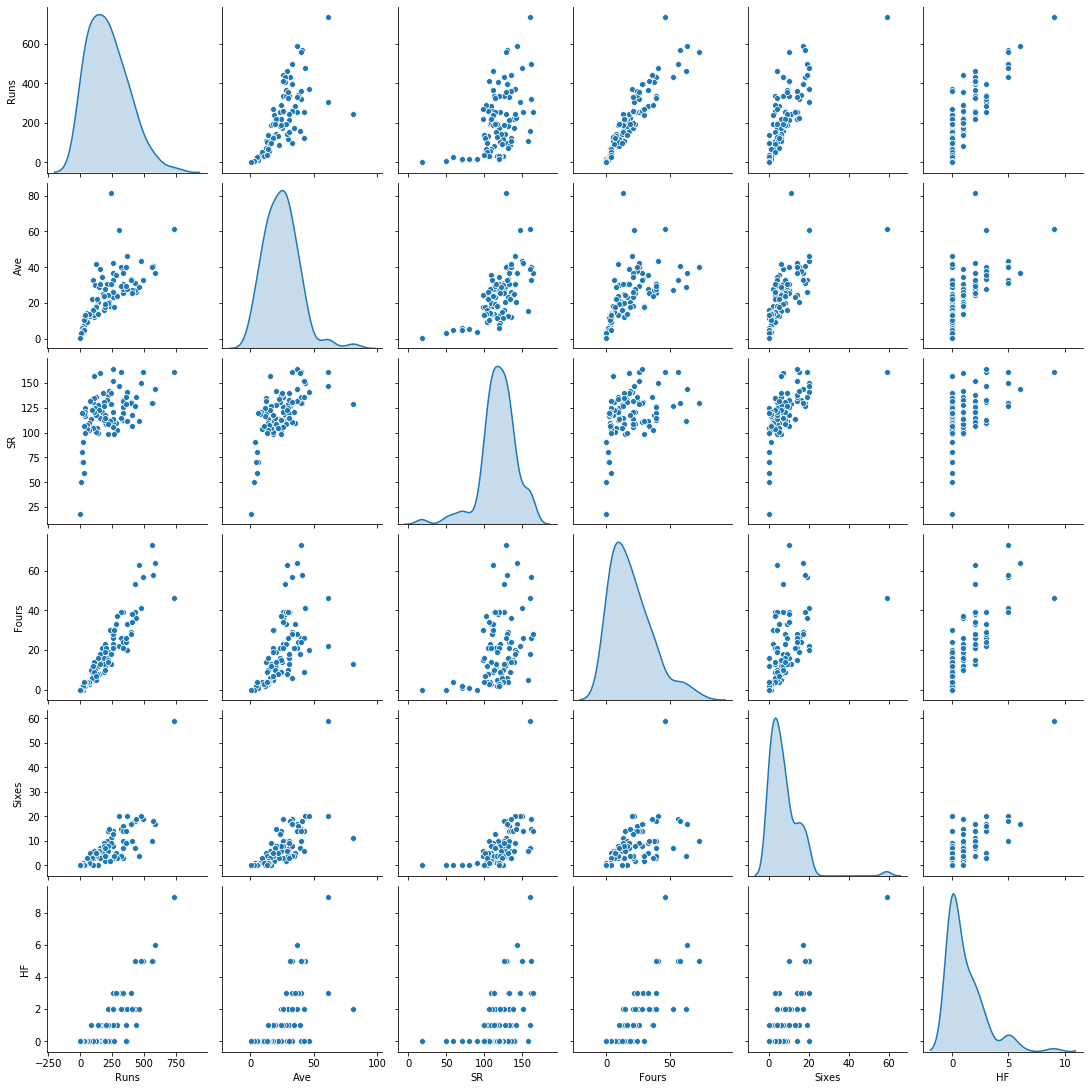

In [14]:
sns.pairplot(df_IPL,diag_kind='kde')
plt.show()

From above pair plots we can see that many columns have long tail so that is the indication of outliers.we will see down the line with the help of correlation matrix what's the strength of correlation and outliers are there or not

# Analysis of each column with the help of plots

Text(0.5, 1.0, 'Box Plot')

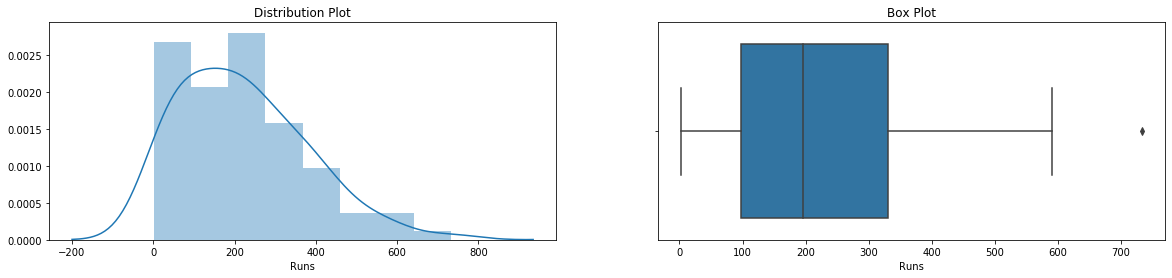

In [16]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_IPL['Runs'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_IPL['Runs'],ax=ax2)
ax2.set_title("Box Plot")

In [23]:
#check how many outliers are there in Run column
q1 = np.quantile(df_IPL['Runs'],0.25)
q2 = np.quantile(df_IPL['Runs'],0.50)
q3 = np.quantile(df_IPL['Runs'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("Runs above",df_IPL['Runs'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in Runs column are",df_IPL[df_IPL['Runs']>77]['Runs'].shape[0])

Quartie1:: 98.0
Quartie2:: 196.5
Quartie3:: 330.75
Inter Quartie Range:: 232.75
Runs above 679.875 are outliers
The Outliers in Runs column are 71


From above we can see that there are some outliers in Runs column and there is one peaks in distribution plot so its normally distributed and there is right skewness because long tail is at right side.

Text(0.5, 1.0, 'Box Plot')

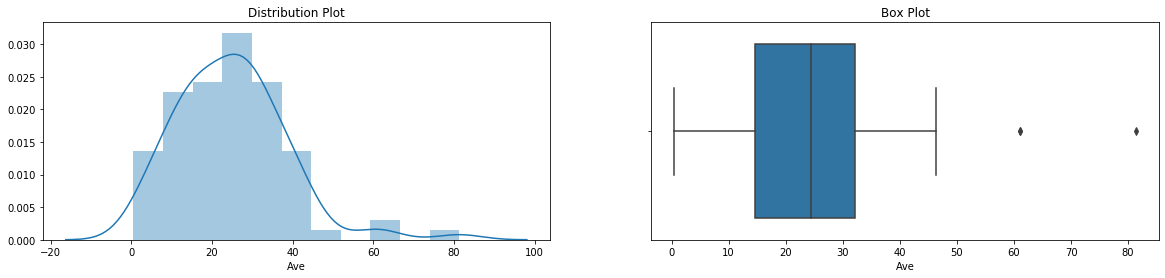

In [17]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_IPL['Ave'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_IPL['Ave'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are some outliers in Ave column and there is one peaks in distribution plot so its normally distributed

In [25]:
#check how many outliers are there in Ave column
q1 = np.quantile(df_IPL['Ave'],0.25)
q2 = np.quantile(df_IPL['Ave'],0.50)
q3 = np.quantile(df_IPL['Ave'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("Ave above",df_IPL['Ave'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in Ave column are",df_IPL[df_IPL['Ave']>77]['Ave'].shape[0])

Quartie1:: 14.665
Quartie2:: 24.44
Quartie3:: 32.19499999999999
Inter Quartie Range:: 17.529999999999994
Ave above 58.48999999999998 are outliers
The Outliers in Ave column are 1


Text(0.5, 1.0, 'Box Plot')

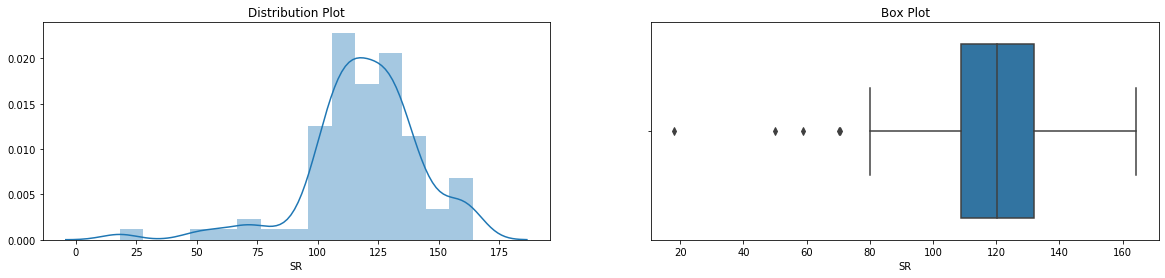

In [18]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_IPL['SR'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_IPL['SR'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are some outliers in SR column and there is left skewness because long tail is at left side.

In [26]:
#check how many outliers are there in SR column
q1 = np.quantile(df_IPL['SR'],0.25)
q2 = np.quantile(df_IPL['SR'],0.50)
q3 = np.quantile(df_IPL['SR'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("Strike rate above",df_IPL['SR'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in Strike rate column are",df_IPL[df_IPL['SR']>77]['SR'].shape[0])

Quartie1:: 108.745
Quartie2:: 120.13499999999999
Quartie3:: 131.9975
Inter Quartie Range:: 23.252499999999998
Strike rate above 166.87625 are outliers
The Outliers in Strike rate column are 85


Text(0.5, 1.0, 'Box Plot')

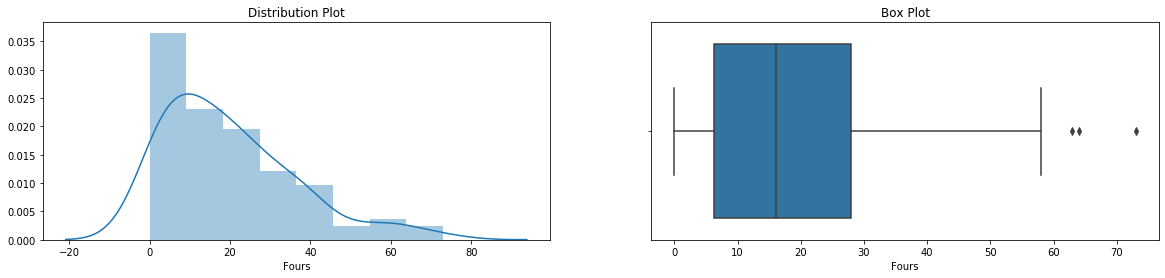

In [19]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_IPL['Fours'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_IPL['Fours'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in Fours column and there is one peaks in distribution plot so its normally distributed and there is right skewness because long tail is at right side.

In [27]:
#check how many outliers are there in Fours column
q1 = np.quantile(df_IPL['Fours'],0.25)
q2 = np.quantile(df_IPL['Fours'],0.50)
q3 = np.quantile(df_IPL['Fours'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("Fours above",df_IPL['Fours'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in Fours column are",df_IPL[df_IPL['Fours']>77]['Fours'].shape[0])

Quartie1:: 6.25
Quartie2:: 16.0
Quartie3:: 28.0
Inter Quartie Range:: 21.75
Fours above 60.625 are outliers
The Outliers in Fours column are 0


Text(0.5, 1.0, 'Box Plot')

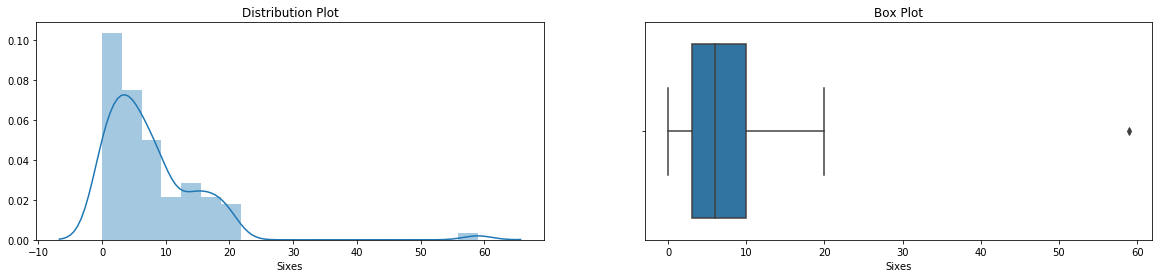

In [20]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_IPL['Sixes'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_IPL['Sixes'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in Sixes column and there are two peaks in distribution plot and there is right skewness because long tail is at right side.

In [28]:
#check how many outliers are there in Sixes column
q1 = np.quantile(df_IPL['Sixes'],0.25)
q2 = np.quantile(df_IPL['Sixes'],0.50)
q3 = np.quantile(df_IPL['Sixes'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("Sixes above",df_IPL['Sixes'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in Sixes column are",df_IPL[df_IPL['Sixes']>77]['Sixes'].shape[0])

Quartie1:: 3.0
Quartie2:: 6.0
Quartie3:: 10.0
Inter Quartie Range:: 7.0
Sixes above 20.5 are outliers
The Outliers in Sixes column are 0


Text(0.5, 1.0, 'Box Plot')

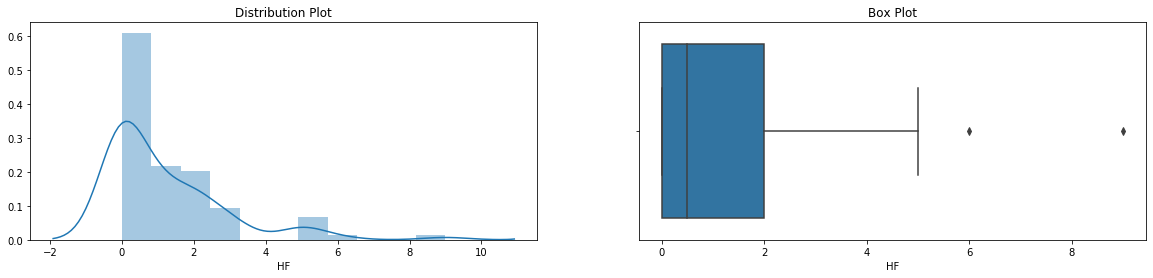

In [21]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_IPL['HF'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_IPL['HF'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in HF column and there are two peaks in distribution plot and there is right skewness because long tail is at right side.

In [29]:
#check how many outliers are there in HF column
q1 = np.quantile(df_IPL['HF'],0.25)
q2 = np.quantile(df_IPL['HF'],0.50)
q3 = np.quantile(df_IPL['HF'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("Number of half centuries above",df_IPL['HF'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in number of half centuries column are",df_IPL[df_IPL['HF']>77]['HF'].shape[0])

Quartie1:: 0.0
Quartie2:: 0.5
Quartie3:: 2.0
Inter Quartie Range:: 2.0
Number of half centuries above 5.0 are outliers
The Outliers in number of half centuries column are 0


# Fix Outliers after dropping missing values

In [30]:
#Runs column outliers
df_IPL.drop(df_IPL[df_IPL['Runs']>679.875].index,axis=0,inplace=True)

In [31]:
#SR column outliers
df_IPL.drop(df_IPL[df_IPL['SR']>166.87625 ].index,axis=0,inplace=True)

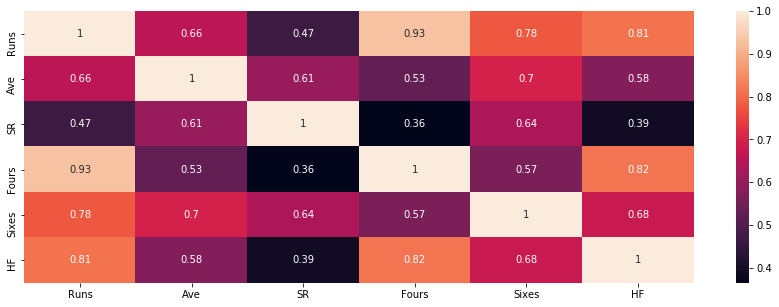

In [59]:
#find the correlation between attributes
plt.figure(figsize=(15,5))
sns.heatmap(df_IPL.corr(),annot=True)
plt.show()

# PART V :

List down all possible dimensionality reduction techniques that can be implemented using python.

Ans : Common Dimensionality Reduction Techniques are:
       1. Missing Value Ratio
       2. Low Variance Filter
       3. High Correlation Filter
       4.Random Forest
       5. Backward Feature Elimination
       6.Forward Feature Selection
       7.Factor Analysis
       8.Principal Component Analysis
       9.Independent Component Analysis
       10.Methods Based on Projections
       11.T-Distributed Stochastic Neighbor Embedding (t-SNE)
       12.UMAP

So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and
text data ? Please illustrate your findings using a simple implementation on python.

Ans :The image is a combination of pixels in rows placed one after another to form one single image each pixel value represents the intensity value of the image, so multiple images can form a matrix considering a row of pixels as a vector. It requires huge amounts of storage while working with many images where we are using PCA is used to compress it and preserve the data as much as possible.